In [1]:
import numpy as np
import util

In [2]:
step_size=0.01
eps=1e-5
max_iter=1000000

In [3]:
train_path='ds1_train.csv'
valid_path='ds1_valid.csv'
save_path='logreg_pred_1.txt'
x_train, y_train = util.load_dataset(train_path, add_intercept=True)

In [7]:
x = x_train
y = y_train

In [68]:
theta = np.zeros(x.shape[1])

In [27]:
gz = 1/(1+np.exp(-theta.dot(x.T)))

In [31]:
-np.mean((y-gz)*x.T)

-0.9723056896358215

In [29]:
y.shape

(800,)

In [42]:
((y-gz)*x.T).shape

(3, 800)

In [43]:
G_J_theta = -np.mean((y-gz)*x.T,axis=1)

In [44]:
G_J_theta

array([-0.        , -0.39548487, -2.5214322 ])

In [33]:
H = np.zeros((x.shape[1],x.shape[1]))

In [34]:
H.shape

(3, 3)

In [35]:
H = np.zeros((x.shape[1],x.shape[1]))
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        H[i][j] = np.mean(gz*(1-gz)*x[:,i]*x[:,j])

In [36]:
H

array([[ 0.25      ,  0.31645631,  1.85438468],
       [ 0.31645631,  0.79540001,  4.6615269 ],
       [ 1.85438468,  4.6615269 , 58.51287669]])

In [45]:
np.linalg.inv(H).dot(G_J_theta)

array([ 1.26793901, -0.96347061, -0.00651882])

In [47]:
theta_prev = theta

In [49]:
theta = theta - step_size*np.linalg.inv(H).dot(G_J_theta)
diff = np.linalg.norm(theta - theta_prev, ord=1)

In [60]:
theta = np.zeros(x.shape[1])

count = 0
diff = 0.5
while diff > eps or count > max_iter:
    theta_prev = theta
    gz = 1/(1+np.exp(-theta.dot(x.T)))
    G_J_theta = -np.mean((y-gz)*x.T,axis=1)

    H = np.zeros((x.shape[1],x.shape[1]))
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            H[i][j] = np.mean(gz*(1-gz)*x[:,i]*x[:,j])
    theta = theta - step_size*np.linalg.inv(H).dot(G_J_theta)
    diff = np.linalg.norm(theta - theta_prev, ord=1)
    count = count + 1

In [61]:
theta

array([-2.40785407,  1.03431207,  0.24463249])

In [64]:
y_pred = 1/(1+np.exp(-x_eval.dot(theta)))

In [66]:
y_pred

array([0.08399859, 0.412811  , 0.21189975, 0.06142538, 0.43161616,
       0.18927335, 0.99964575, 0.17010505, 0.04514251, 0.3194279 ,
       0.81129625, 0.06284147, 0.27767493, 0.17180209, 0.93878039,
       0.06151799, 0.21348791, 0.30532183, 0.77643767, 0.17976332,
       0.25352692, 0.0459576 , 0.19087675, 0.36250053, 0.11593763,
       0.30325139, 0.41701095, 0.03639514, 0.03275611, 0.12500342,
       0.04880829, 0.08186472, 0.04172528, 0.22817874, 0.73615275,
       0.35993901, 0.07442276, 0.46623943, 0.1010201 , 0.04908436,
       0.23949695, 0.42676479, 0.07967986, 0.09601366, 0.91430547,
       0.04386883, 0.16445557, 0.0868558 , 0.07186776, 0.24080634,
       0.9997959 , 0.1933066 , 0.99967111, 0.38957531, 0.85169276,
       0.89676174, 0.72009878, 0.60520636, 0.64272039, 0.94965382,
       0.82749095, 0.84297048, 0.1820872 , 0.88067412, 0.96439945,
       0.65141453, 0.82881733, 0.99860135, 0.37939841, 0.94817881,
       0.97739293, 0.31186734, 0.63002966, 0.42625433, 0.80199

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [62]:
valid_path='ds1_valid.csv'
x_eval, y_eval = util.load_dataset(valid_path, add_intercept=True)

ValueError: fname must be a PathLike or file handle

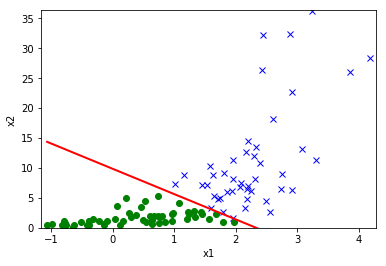

In [68]:
util.plot(x_eval,np.round(y_pred),theta,None)

# GDA

In [23]:
y = y_train
x = x_train

In [6]:
y_train.shape

(800,)

In [9]:
y_train.dot(x_train)

array([ 400.        ,  822.71800036, 4984.16125055])

In [12]:
y_train.sum()

400.0

In [13]:
b.shape

(800,)

In [20]:
(y_train*x_train.T).shape

(3, 800)

In [26]:
y0 = 1-y
phi = y.sum()/y.shape[0]
mu0 = y0*x.T/y0.sum()
mu1 = y*x.T/y.sum()

In [31]:
sigma = (x.T - mu0).dot((x.T - mu1).T)/y.shape[0]

In [65]:
thetaT = np.mean((mu1-mu0),axis=1).T.dot(np.linalg.inv(sigma))

In [93]:
np.matmul(mu0.T, np.linalg.inv(sigma)).shape

(800, 3)

In [66]:
thetaT

array([-1.58889600e-03,  1.20735666e-03,  8.16894261e-06])

In [49]:
np.linalg.inv(sigma)

array([[ 2.01962981e+00, -8.03617618e-01,  1.56301669e-05],
       [-8.03617618e-01,  9.10818516e-01, -4.70937163e-02],
       [ 1.56301669e-05, -4.70937163e-02,  8.03457690e-03]])

In [62]:
mu0term = (np.mean((x.T-mu0),axis=1).T.dot(np.linalg.inv(sigma))).dot(np.mean((x.T-mu0),axis=1))
mu1term = (np.mean((x.T-mu1),axis=1).T.dot(np.linalg.inv(sigma))).dot(np.mean((x.T-mu1),axis=1))

In [63]:
theta0 = 0.5*(mu0term - mu1term) - np.log((1-phi)/phi)

In [64]:
theta0

2.0650148258027912e-14

In [70]:
count = 0
diff = 0.1

In [90]:
eps

1e-05

In [96]:
x[y==0].shape

(400, 3)

In [98]:
y.mean()

0.5

In [109]:
np.matmul(np.matmul((np.linalg.inv(sigma)),(mu1-mu0)),x).shape

(3, 3)

In [162]:
n, d = x.shape  # Get the shape
if theta is None:
    theta = [np.zeros(1), np.zeros([d, 1])]
# Find phi, mu_0, mu_1, and sigma
phiN = np.mean(y)
mu_0 = np.mean(x[y == 0], axis=0).reshape(d, 1)
mu_1 = np.mean(x[y == 1], axis=0).reshape(d, 1)
mu = [mu_0, mu_1]
total = np.zeros([d, d])
for i in range(n):
    c = x[i, :].reshape(d, 1) - mu[int(y[i])]
    total += np.matmul(c, c.T)
sigmaM = total / n

In [113]:
mu_0

array([[1.        ],
       [0.47485551],
       [2.37467434]])

In [163]:
sigmaM

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.95365334,   5.26804658],
       [  0.        ,   5.26804658, 153.60114461]])

In [148]:
mu0 = np.mean(x[y == 0], axis=0).reshape(d,1)
mu1 = np.mean(x[y == 1], axis=0).reshape(d,1)

In [142]:
mu0.T.shape

(1, 3)

In [146]:
np.tile(mu0.T,(10,1)).shape

(10, 3)

In [147]:
x.shape

(800, 3)

In [153]:
sigma = (x.T - np.tile(mu0.T,(n,1)).T).dot((x - np.tile(mu1.T,(n,1))))/y.shape[0]

In [154]:
sigma

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.95365334,   5.26804658],
       [  0.        ,   5.26804658, 153.60114461]])

In [168]:
np.matmul(np.linalg.pinv(sigma),(mu1-mu0)).shape

(3, 1)

In [175]:
t0 = 0.5*(np.matmul(mu0.T,np.matmul(np.linalg.pinv(sigma),mu0))\
     - np.matmul(mu1.T,np.matmul(np.linalg.pinv(sigma),mu1))) - np.log((1-phi)/phi)

In [186]:
t1 = np.matmul(np.linalg.pinv(sigma),(mu1-mu0))


In [177]:
z = np.matmul(x, t1) + np.tile(t0,(n,1))
gz = 1/(1 + np.exp(-z))

In [180]:
gz.reshape(n,).shape

(800,)

In [182]:
t1.reshape(3,).shape

(3,)

In [183]:
t0

array([[-2.10437509]])

In [188]:
t1.shape

(3, 1)

In [185]:
x.shape

(800, 3)

In [191]:
y0 = 1-y
phi = y.mean()
mu0 = np.mean(x[y == 0], axis=0).reshape(d, 1)
mu1 = np.mean(x[y == 1], axis=0).reshape(d, 1)
sigma = (x.T - np.tile(mu0.T,(n,1)).T).dot((x - np.tile(mu1.T,(n,1))))/n

th1 = np.matmul(np.linalg.pinv(sigma),(mu1-mu0))
th0 = 0.5*(np.matmul(mu0.T,np.matmul(np.linalg.pinv(sigma),mu0))\
            - np.matmul(mu1.T,np.matmul(np.linalg.pinv(sigma),mu1))) - np.log((1-phi)/phi)

In [202]:
theta1 = np.matmul(np.linalg.pinv(sigma),(mu1-mu0))
theta0 = 0.5*(np.matmul(mu0.T,np.matmul(np.linalg.pinv(sigma),mu0)) 
              - np.matmul(mu1.T,np.matmul(np.linalg.pinv(sigma),mu1))) - np.log((1-phi)/phi)                                                                  
theta = np.append(theta0,theta1)

In [206]:
theta.reshape(4,1)[1:]

array([[0.        ],
       [1.59905448],
       [0.01081916]])

In [194]:
th0

array([[-2.10437509]])

In [223]:
theta = np.zeros(3)

In [210]:
thetaME

array([ 1.59905448,  0.01081916, -2.10437509])

In [225]:
theta = np.zeros(3)
count = 0
diff = 0.1
while diff > eps and count <= max_iter:
    theta_prev = theta
    theta = theta + step_size*thetaME
    diff = np.linalg.norm(theta - theta_prev, ord=1)
    count = count + 1
    print(count)
    print(diff)
    print(theta)

1
0.03714248730900023
[ 0.01599054  0.00010819 -0.02104375]
2
0.03714248730900023
[ 0.03198109  0.00021638 -0.0420875 ]
3
0.03714248730900024
[ 0.04797163  0.00032457 -0.06313125]
4
0.03714248730900022
[ 0.06396218  0.00043277 -0.084175  ]
5
0.03714248730900022
[ 0.07995272  0.00054096 -0.10521875]
6
0.03714248730900024
[ 0.09594327  0.00064915 -0.12626251]
7
0.03714248730900022
[ 0.11193381  0.00075734 -0.14730626]
8
0.03714248730900024
[ 0.12792436  0.00086553 -0.16835001]
9
0.03714248730900024
[ 0.1439149   0.00097372 -0.18939376]
10
0.03714248730900024
[ 0.15990545  0.00108192 -0.21043751]
11
0.03714248730900024
[ 0.17589599  0.00119011 -0.23148126]
12
0.037142487309000265
[ 0.19188654  0.0012983  -0.25252501]
13
0.037142487309000265
[ 0.20787708  0.00140649 -0.27356876]
14
0.037142487309000265
[ 0.22386763  0.00151468 -0.29461251]
15
0.037142487309000265
[ 0.23985817  0.00162287 -0.31565626]
16
0.03714248730900024
[ 0.25584872  0.00173107 -0.33670001]
17
0.037142487309000265
[ 0.2

[ 7.56352771  0.05117462 -9.95369416]
474
0.03714248730900043
[ 7.57951825  0.05128282 -9.97473791]
475
0.03714248730900043
[ 7.5955088   0.05139101 -9.99578167]
476
0.03714248730900043
[  7.61149934   0.0514992  -10.01682542]
477
0.03714248730900043
[  7.62748989   0.05160739 -10.03786917]
478
0.03714248730900043
[  7.64348043   0.05171558 -10.05891292]
479
0.03714248730900043
[  7.65947098   0.05182377 -10.07995667]
480
0.03714248730900043
[  7.67546152   0.05193197 -10.10100042]
481
0.03714248730900043
[  7.69145207   0.05204016 -10.12204417]
482
0.03714248730900043
[  7.70744261   0.05214835 -10.14308792]
483
0.03714248730900043
[  7.72343316   0.05225654 -10.16413167]
484
0.03714248730900043
[  7.7394237    0.05236473 -10.18517542]
485
0.03714248730900043
[  7.75541425   0.05247292 -10.20621917]
486
0.03714248730900043
[  7.77140479   0.05258112 -10.22726293]
487
0.03714248730900043
[  7.78739534   0.05268931 -10.24830668]
488
0.03714248730900043
[  7.80338588   0.0527975  -10.269

[ 15.27097032   0.10332297 -20.09678209]
956
0.03714248730900131
[ 15.28696087   0.10343117 -20.11782584]
957
0.03714248730900131
[ 15.30295141   0.10353936 -20.13886959]
958
0.03714248730900131
[ 15.31894196   0.10364755 -20.15991334]
959
0.03714248730900131
[ 15.3349325    0.10375574 -20.18095709]
960
0.03714248730900131
[ 15.35092304   0.10386393 -20.20200084]
961
0.03714248730900131
[ 15.36691359   0.10397212 -20.22304459]
962
0.03714248730900131
[ 15.38290413   0.10408031 -20.24408834]
963
0.03714248730900131
[ 15.39889468   0.10418851 -20.26513209]
964
0.03714248730900131
[ 15.41488522   0.1042967  -20.28617584]
965
0.03714248730900131
[ 15.43087577   0.10440489 -20.30721959]
966
0.03714248730900131
[ 15.44686631   0.10451308 -20.32826335]
967
0.03714248730900131
[ 15.46285686   0.10462127 -20.3493071 ]
968
0.03714248730900131
[ 15.4788474    0.10472946 -20.37035085]
969
0.03714248730900131
[ 15.49483795   0.10483766 -20.3913946 ]
970
0.03714248730900131
[ 15.51082849   0.1049458

[ 20.88365156   0.14129822 -27.48313864]
1307
0.037142487309001326
[ 20.8996421    0.14140642 -27.50418239]
1308
0.037142487309001326
[ 20.91563265   0.14151461 -27.52522614]
1309
0.037142487309001326
[ 20.93162319   0.1416228  -27.5462699 ]
1310
0.037142487309001326
[ 20.94761374   0.14173099 -27.56731365]
1311
0.037142487309001326
[ 20.96360428   0.14183918 -27.5883574 ]
1312
0.037142487309001326
[ 20.97959483   0.14194737 -27.60940115]
1313
0.037142487309001326
[ 20.99558537   0.14205556 -27.6304449 ]
1314
0.037142487309001326
[ 21.01157592   0.14216376 -27.65148865]
1315
0.037142487309001326
[ 21.02756646   0.14227195 -27.6725324 ]
1316
0.037142487309001326
[ 21.04355701   0.14238014 -27.69357615]
1317
0.037142487309001326
[ 21.05954755   0.14248833 -27.7146199 ]
1318
0.037142487309001326
[ 21.0755381    0.14259652 -27.73566365]
1319
0.037142487309001326
[ 21.09152864   0.14270471 -27.7567074 ]
1320
0.037142487309001326
[ 21.10751919   0.14281291 -27.77775116]
1321
0.03714248730900

[ 28.87892398   0.19539402 -38.00501408]
1807
0.037142487308997774
[ 28.89491452   0.19550221 -38.02605783]
1808
0.037142487308997774
[ 28.91090507   0.1956104  -38.04710158]
1809
0.037142487308997774
[ 28.92689561   0.1957186  -38.06814533]
1810
0.037142487308997774
[ 28.94288616   0.19582679 -38.08918908]
1811
0.037142487308997774
[ 28.9588767    0.19593498 -38.11023284]
1812
0.037142487308997774
[ 28.97486725   0.19604317 -38.13127659]
1813
0.037142487308997774
[ 28.99085779   0.19615136 -38.15232034]
1814
0.037142487308997774
[ 29.00684834   0.19625955 -38.17336409]
1815
0.037142487308997774
[ 29.02283888   0.19636775 -38.19440784]
1816
0.037142487308997774
[ 29.03882943   0.19647594 -38.21545159]
1817
0.037142487308997774
[ 29.05481997   0.19658413 -38.23649534]
1818
0.037142487308997774
[ 29.07081052   0.19669232 -38.25753909]
1819
0.037142487308997774
[ 29.08680106   0.19680051 -38.27858284]
1820
0.037142487308997774
[ 29.10279161   0.1969087  -38.29962659]
1821
0.03714248730899

0.037142487309001326
[ 36.8741964    0.24948982 -48.52688952]
2307
0.037142487309001326
[ 36.89018694   0.24959801 -48.54793327]
2308
0.037142487309001326
[ 36.90617749   0.2497062  -48.56897702]
2309
0.037142487309001326
[ 36.92216803   0.24981439 -48.59002077]
2310
0.037142487309001326
[ 36.93815858   0.24992259 -48.61106452]
2311
0.0371424873090013
[ 36.95414912   0.25003078 -48.63210827]
2312
0.037142487309001326
[ 36.97013967   0.25013897 -48.65315202]
2313
0.037142487309001326
[ 36.98613021   0.25024716 -48.67419577]
2314
0.037142487309001326
[ 37.00212076   0.25035535 -48.69523953]
2315
0.037142487309001326
[ 37.0181113    0.25046354 -48.71628328]
2316
0.037142487309001326
[ 37.03410185   0.25057173 -48.73732703]
2317
0.037142487309001326
[ 37.05009239   0.25067993 -48.75837078]
2318
0.037142487309001326
[ 37.06608294   0.25078812 -48.77941453]
2319
0.037142487309001326
[ 37.08207348   0.25089631 -48.80045828]
2320
0.037142487309001326
[ 37.09806403   0.2510045  -48.82150203]
23

0.037142487309001326
[ 44.86946882   0.30358562 -59.04876496]
2807
0.037142487309001326
[ 44.88545936   0.30369381 -59.06980871]
2808
0.037142487309001326
[ 44.90144991   0.303802   -59.09085246]
2809
0.037142487309001326
[ 44.91744045   0.30391019 -59.11189621]
2810
0.037142487309001326
[ 44.933431     0.30401838 -59.13293996]
2811
0.037142487309001326
[ 44.94942154   0.30412657 -59.15398371]
2812
0.037142487309001326
[ 44.96541209   0.30423477 -59.17502746]
2813
0.037142487309001326
[ 44.98140263   0.30434296 -59.19607121]
2814
0.037142487309001326
[ 44.99739318   0.30445115 -59.21711496]
2815
0.037142487309001326
[ 45.01338372   0.30455934 -59.23815871]
2816
0.037142487309001326
[ 45.02937427   0.30466753 -59.25920246]
2817
0.037142487309001326
[ 45.04536481   0.30477572 -59.28024622]
2818
0.037142487309001326
[ 45.06135535   0.30488392 -59.30128997]
2819
0.037142487309001326
[ 45.0773459    0.30499211 -59.32233372]
2820
0.037142487309001326
[ 45.09333644   0.3051003  -59.34337747]


3306
0.037142487309001326
[ 52.86474124   0.35768141 -69.57064039]
3307
0.037142487309001326
[ 52.88073178   0.35778961 -69.59168414]
3308
0.037142487309001326
[ 52.89672233   0.3578978  -69.6127279 ]
3309
0.037142487309001326
[ 52.91271287   0.35800599 -69.63377165]
3310
0.037142487309001326
[ 52.92870342   0.35811418 -69.6548154 ]
3311
0.037142487309001326
[ 52.94469396   0.35822237 -69.67585915]
3312
0.037142487309001326
[ 52.96068451   0.35833056 -69.6969029 ]
3313
0.037142487309001326
[ 52.97667505   0.35843876 -69.71794665]
3314
0.037142487309001326
[ 52.99266559   0.35854695 -69.7389904 ]
3315
0.037142487309001326
[ 53.00865614   0.35865514 -69.76003415]
3316
0.037142487309001326
[ 53.02464668   0.35876333 -69.7810779 ]
3317
0.037142487309001326
[ 53.04063723   0.35887152 -69.80212165]
3318
0.037142487309001326
[ 53.05662777   0.35897971 -69.8231654 ]
3319
0.037142487309001326
[ 53.07261832   0.3590879  -69.84420915]
3320
0.037142487309001326
[ 53.08860886   0.3591961  -69.86525

3806
0.037142487309001326
[ 60.86001366   0.41177721 -80.09251583]
3807
0.037142487309001326
[ 60.8760042    0.4118854  -80.11355958]
3808
0.037142487309001326
[ 60.89199474   0.41199359 -80.13460333]
3809
0.037142487309001326
[ 60.90798529   0.41210179 -80.15564708]
3810
0.037142487309001326
[ 60.92397583   0.41220998 -80.17669083]
3811
0.037142487309001326
[ 60.93996638   0.41231817 -80.19773459]
3812
0.037142487309001326
[ 60.95595692   0.41242636 -80.21877834]
3813
0.037142487309001326
[ 60.97194747   0.41253455 -80.23982209]
3814
0.037142487309001326
[ 60.98793801   0.41264274 -80.26086584]
3815
0.037142487309001326
[ 61.00392856   0.41275094 -80.28190959]
3816
0.037142487309001326
[ 61.0199191    0.41285913 -80.30295334]
3817
0.037142487309001326
[ 61.03590965   0.41296732 -80.32399709]
3818
0.037142487309001326
[ 61.05190019   0.41307551 -80.34504084]
3819
0.037142487309001326
[ 61.06789074   0.4131837  -80.36608459]
3820
0.037142487309001326
[ 61.08388128   0.41329189 -80.38712

[ 68.83929553   0.46576482 -90.59334752]
4306
0.03714248730899422
[ 68.85528607   0.46587301 -90.61439127]
4307
0.03714248730899422
[ 68.87127662   0.4659812  -90.63543502]
4308
0.03714248730899422
[ 68.88726716   0.46608939 -90.65647877]
4309
0.03714248730899422
[ 68.90325771   0.46619758 -90.67752252]
4310
0.03714248730899422
[ 68.91924825   0.46630578 -90.69856627]
4311
0.03714248730899422
[ 68.9352388    0.46641397 -90.71961002]
4312
0.03714248730899422
[ 68.95122934   0.46652216 -90.74065377]
4313
0.03714248730899422
[ 68.96721989   0.46663035 -90.76169752]
4314
0.03714248730899422
[ 68.98321043   0.46673854 -90.78274128]
4315
0.03714248730899422
[ 68.99920098   0.46684673 -90.80378503]
4316
0.03714248730899422
[ 69.01519152   0.46695493 -90.82482878]
4317
0.03714248730899422
[ 69.03118207   0.46706312 -90.84587253]
4318
0.03714248730899422
[ 69.04717261   0.46717131 -90.86691628]
4319
0.03714248730899422
[ 69.06316316   0.4672795  -90.88796003]
4320
0.03714248730899422
[ 69.07915

[  76.83456795    0.51986062 -101.11522296]
4806
0.037142487308994165
[  76.85055849    0.51996881 -101.13626671]
4807
0.037142487308994165
[  76.86654904    0.520077   -101.15731046]
4808
0.037142487308994165
[  76.88253958    0.52018519 -101.17835421]
4809
0.037142487308994165
[  76.89853013    0.52029338 -101.19939796]
4810
0.037142487308994165
[  76.91452067    0.52040157 -101.22044171]
4811
0.037142487308994165
[  76.93051122    0.52050976 -101.24148546]
4812
0.037142487308994165
[  76.94650176    0.52061796 -101.26252921]
4813
0.037142487308994165
[  76.96249231    0.52072615 -101.28357296]
4814
0.037142487308994165
[  76.97848285    0.52083434 -101.30461671]
4815
0.037142487308994165
[  76.9944734     0.52094253 -101.32566046]
4816
0.037142487308994165
[  77.01046394    0.52105072 -101.34670422]
4817
0.037142487308994165
[  77.02645449    0.52115891 -101.36774797]
4818
0.037142487308994165
[  77.04244503    0.52126711 -101.38879172]
4819
0.037142487308994165
[  77.05843558    0.

[  84.70191601    0.57309088 -111.46874839]
5298
0.037142487308994165
[  84.71790655    0.57319907 -111.48979214]
5299
0.037142487308994165
[  84.7338971     0.57330726 -111.51083589]
5300
0.037142487308994165
[  84.74988764    0.57341546 -111.53187964]
5301
0.037142487308994165
[  84.76587819    0.57352365 -111.55292339]
5302
0.037142487308994165
[  84.78186873    0.57363184 -111.57396714]
5303
0.037142487308994165
[  84.79785928    0.57374003 -111.59501089]
5304
0.037142487308994165
[  84.81384982    0.57384822 -111.61605464]
5305
0.037142487308994165
[  84.82984037    0.57395641 -111.63709839]
5306
0.037142487308994165
[  84.84583091    0.5740646  -111.65814214]
5307
0.037142487308994165
[  84.86182146    0.5741728  -111.67918589]
5308
0.037142487308994165
[  84.877812      0.57428099 -111.70022965]
5309
0.037142487308994165
[  84.89380255    0.57438918 -111.7212734 ]
5310
0.037142487308994165
[  84.90979309    0.57449737 -111.74231715]
5311
0.037142487308994165
[  84.92578364    0.

5700
0.037142487308994165
[  91.14610558    0.61669209 -119.94937999]
5701
0.037142487308994165
[  91.16209612    0.61680028 -119.97042374]
5702
0.037142487308994165
[  91.17808667    0.61690848 -119.99146749]
5703
0.037142487308994165
[  91.19407721    0.61701667 -120.01251124]
5704
0.037142487308994165
[  91.21006776    0.61712486 -120.03355499]
5705
0.037142487308994165
[  91.2260583     0.61723305 -120.05459874]
5706
0.037142487308994165
[  91.24204885    0.61734124 -120.07564249]
5707
0.037142487308994165
[  91.25803939    0.61744943 -120.09668624]
5708
0.037142487308994165
[  91.27402994    0.61755763 -120.11773   ]
5709
0.037142487308994165
[  91.29002048    0.61766582 -120.13877375]
5710
0.037142487308994165
[  91.30601103    0.61777401 -120.1598175 ]
5711
0.037142487308994165
[  91.32200157    0.6178822  -120.18086125]
5712
0.037142487308994165
[  91.33799212    0.61799039 -120.201905  ]
5713
0.037142487308994165
[  91.35398266    0.61809858 -120.22294875]
5714
0.0371424873089

0.037142487309008376
[  98.14996422    0.66408001 -129.16654287]
6139
0.037142487309008376
[  98.16595476    0.6641882  -129.18758662]
6140
0.037142487309008376
[  98.18194531    0.6642964  -129.20863037]
6141
0.037142487309008376
[  98.19793585    0.66440459 -129.22967412]
6142
0.037142487309008376
[  98.2139264     0.66451278 -129.25071788]
6143
0.037142487309008376
[  98.22991694    0.66462097 -129.27176163]
6144
0.037142487309008376
[  98.24590749    0.66472916 -129.29280538]
6145
0.037142487309008376
[  98.26189803    0.66483735 -129.31384913]
6146
0.037142487309008376
[  98.27788858    0.66494554 -129.33489288]
6147
0.037142487309008376
[  98.29387912    0.66505374 -129.35593663]
6148
0.037142487309008376
[  98.30986967    0.66516193 -129.37698038]
6149
0.037142487309008376
[  98.32586021    0.66527012 -129.39802413]
6150
0.037142487309008376
[  98.34185076    0.66537831 -129.41906788]
6151
0.037142487309008376
[  98.3578413     0.6654865  -129.44011163]
6152
0.037142487309008376

[ 106.11325555    0.71795943 -139.64633081]
6637
0.037142487309008376
[ 106.12924609    0.71806762 -139.66737456]
6638
0.037142487309008376
[ 106.14523664    0.71817581 -139.68841831]
6639
0.037142487309008376
[ 106.16122718    0.718284   -139.70946206]
6640
0.037142487309008376
[ 106.17721773    0.71839219 -139.73050581]
6641
0.037142487309008376
[ 106.19320827    0.71850038 -139.75154956]
6642
0.037142487309008376
[ 106.20919882    0.71860858 -139.77259331]
6643
0.037142487309008376
[ 106.22518936    0.71871677 -139.79363706]
6644
0.037142487309008376
[ 106.24117991    0.71882496 -139.81468081]
6645
0.037142487309008376
[ 106.25717045    0.71893315 -139.83572457]
6646
0.037142487309008376
[ 106.273161      0.71904134 -139.85676832]
6647
0.037142487309008376
[ 106.28915154    0.71914953 -139.87781207]
6648
0.037142487309008376
[ 106.30514209    0.71925773 -139.89885582]
6649
0.037142487309008376
[ 106.32113263    0.71936592 -139.91989957]
6650
0.037142487309008376
[ 106.33712318    0.

7121
0.037142487309008376
[ 113.86866979    0.77043235 -149.85254998]
7122
0.037142487309008376
[ 113.88466034    0.77054054 -149.87359373]
7123
0.037142487309008376
[ 113.90065088    0.77064873 -149.89463748]
7124
0.037142487309008376
[ 113.91664143    0.77075692 -149.91568124]
7125
0.037142487309008376
[ 113.93263197    0.77086512 -149.93672499]
7126
0.037142487309008376
[ 113.94862252    0.77097331 -149.95776874]
7127
0.037142487309008376
[ 113.96461306    0.7710815  -149.97881249]
7128
0.037142487309008376
[ 113.98060361    0.77118969 -149.99985624]
7129
0.037142487309008376
[ 113.99659415    0.77129788 -150.02089999]
7130
0.037142487309008376
[ 114.0125847     0.77140607 -150.04194374]
7131
0.037142487309008376
[ 114.02857524    0.77151427 -150.06298749]
7132
0.037142487309008376
[ 114.04456579    0.77162246 -150.08403124]
7133
0.037142487309008376
[ 114.06055633    0.77173065 -150.10507499]
7134
0.037142487309008376
[ 114.07654688    0.77183884 -150.12611874]
7135
0.0371424873090

[ 120.80856625    0.8173875  -158.98553786]
7556
0.037142487309008376
[ 120.8245568     0.81749569 -159.00658161]
7557
0.037142487309008376
[ 120.84054734    0.81760389 -159.02762536]
7558
0.037142487309008376
[ 120.85653789    0.81771208 -159.04866911]
7559
0.037142487309008376
[ 120.87252843    0.81782027 -159.06971287]
7560
0.037142487309008376
[ 120.88851898    0.81792846 -159.09075662]
7561
0.037142487309008376
[ 120.90450952    0.81803665 -159.11180037]
7562
0.037142487309008376
[ 120.92050007    0.81814484 -159.13284412]
7563
0.037142487309008376
[ 120.93649061    0.81825304 -159.15388787]
7564
0.037142487309008376
[ 120.95248116    0.81836123 -159.17493162]
7565
0.037142487309008376
[ 120.9684717     0.81846942 -159.19597537]
7566
0.037142487309008376
[ 120.98446225    0.81857761 -159.21701912]
7567
0.037142487309008376
[ 121.00045279    0.8186858  -159.23806287]
7568
0.037142487309008376
[ 121.01644334    0.81879399 -159.25910662]
7569
0.037142487309008376
[ 121.03243388    0.

[ 128.00431143    0.86607372 -168.45522576]
8006
0.037142487309008376
[ 128.02030198    0.86618191 -168.47626951]
8007
0.037142487309008376
[ 128.03629252    0.8662901  -168.49731326]
8008
0.037142487309008376
[ 128.05228307    0.8663983  -168.51835701]
8009
0.037142487309008376
[ 128.06827361    0.86650649 -168.53940076]
8010
0.037142487309008376
[ 128.08426416    0.86661468 -168.56044451]
8011
0.037142487309008376
[ 128.1002547     0.86672287 -168.58148826]
8012
0.037142487309008376
[ 128.11624525    0.86683106 -168.60253201]
8013
0.037142487309008376
[ 128.13223579    0.86693925 -168.62357576]
8014
0.037142487309008376
[ 128.14822634    0.86704744 -168.64461951]
8015
0.037142487309008376
[ 128.16421688    0.86715564 -168.66566326]
8016
0.037142487309008376
[ 128.18020743    0.86726383 -168.68670702]
8017
0.037142487309008376
[ 128.19619797    0.86737202 -168.70775077]
8018
0.037142487309008376
[ 128.21218851    0.86748021 -168.72879452]
8019
0.037142487309008376
[ 128.22817906    0.

8471
0.037142487309008376
[ 135.45590533    0.916491   -178.26161366]
8472
0.037142487309008376
[ 135.47189587    0.9165992  -178.28265741]
8473
0.037142487309008376
[ 135.48788642    0.91670739 -178.30370117]
8474
0.037142487309008376
[ 135.50387696    0.91681558 -178.32474492]
8475
0.037142487309008376
[ 135.51986751    0.91692377 -178.34578867]
8476
0.037142487309008376
[ 135.53585805    0.91703196 -178.36683242]
8477
0.037142487309008376
[ 135.5518486     0.91714015 -178.38787617]
8478
0.037142487309008376
[ 135.56783914    0.91724834 -178.40891992]
8479
0.037142487309008376
[ 135.58382969    0.91735654 -178.42996367]
8480
0.037142487309008376
[ 135.59982023    0.91746473 -178.45100742]
8481
0.037142487309008376
[ 135.61581078    0.91757292 -178.47205117]
8482
0.037142487309008376
[ 135.63180132    0.91768111 -178.49309492]
8483
0.037142487309008376
[ 135.64779186    0.9177893  -178.51413867]
8484
0.037142487309008376
[ 135.66378241    0.91789749 -178.53518243]
8485
0.0371424873090

[ 143.05141413    0.96788201 -188.25739533]
8947
0.037142487309008376
[ 143.06740467    0.9679902  -188.27843908]
8948
0.037142487309008376
[ 143.08339521    0.96809839 -188.29948283]
8949
0.037142487309008376
[ 143.09938576    0.96820659 -188.32052658]
8950
0.037142487309008376
[ 143.1153763     0.96831478 -188.34157033]
8951
0.037142487309008376
[ 143.13136685    0.96842297 -188.36261408]
8952
0.037142487309008376
[ 143.14735739    0.96853116 -188.38365784]
8953
0.037142487309008376
[ 143.16334794    0.96863935 -188.40470159]
8954
0.037142487309008376
[ 143.17933848    0.96874754 -188.42574534]
8955
0.037142487309008376
[ 143.19532903    0.96885574 -188.44678909]
8956
0.037142487309008376
[ 143.21131957    0.96896393 -188.46783284]
8957
0.037142487309008376
[ 143.22731012    0.96907212 -188.48887659]
8958
0.037142487309008376
[ 143.24330066    0.96918031 -188.50992034]
8959
0.037142487309008376
[ 143.25929121    0.9692885  -188.53096409]
8960
0.037142487309008376
[ 143.27528175    0.

[ 149.55956587    1.01191599 -196.82220194]
9354
0.03714248730900849
[ 149.57555642    1.01202418 -196.84324569]
9355
0.03714248730900849
[ 149.59154696    1.01213237 -196.86428944]
9356
0.03714248730900849
[ 149.60753751    1.01224057 -196.88533319]
9357
0.03714248730900849
[ 149.62352805    1.01234876 -196.90637694]
9358
0.03714248730900849
[ 149.6395186     1.01245695 -196.92742069]
9359
0.03714248730900849
[ 149.65550914    1.01256514 -196.94846444]
9360
0.03714248730900849
[ 149.67149969    1.01267333 -196.96950819]
9361
0.03714248730900849
[ 149.68749023    1.01278152 -196.99055194]
9362
0.03714248730900849
[ 149.70348078    1.01288972 -197.01159569]
9363
0.03714248730900849
[ 149.71947132    1.01299791 -197.03263944]
9364
0.03714248730900849
[ 149.73546187    1.0131061  -197.0536832 ]
9365
0.03714248730900849
[ 149.75145241    1.01321429 -197.07472695]
9366
0.03714248730900849
[ 149.76744296    1.01332248 -197.0957707 ]
9367
0.03714248730900849
[ 149.7834335     1.01343067 -197.

[ 157.09111249    1.06287423 -206.7338086 ]
9825
0.03714248730900849
[ 157.10710304    1.06298242 -206.75485235]
9826
0.03714248730900849
[ 157.12309358    1.06309062 -206.7758961 ]
9827
0.03714248730900849
[ 157.13908413    1.06319881 -206.79693985]
9828
0.03714248730900849
[ 157.15507467    1.063307   -206.8179836 ]
9829
0.03714248730900849
[ 157.17106522    1.06341519 -206.83902735]
9830
0.03714248730900849
[ 157.18705576    1.06352338 -206.8600711 ]
9831
0.03714248730900849
[ 157.20304631    1.06363157 -206.88111485]
9832
0.03714248730900849
[ 157.21903685    1.06373976 -206.90215861]
9833
0.03714248730900849
[ 157.2350274     1.06384796 -206.92320236]
9834
0.03714248730900849
[ 157.25101794    1.06395615 -206.94424611]
9835
0.03714248730900849
[ 157.26700849    1.06406434 -206.96528986]
9836
0.03714248730900849
[ 157.28299903    1.06417253 -206.98633361]
9837
0.03714248730900849
[ 157.29898958    1.06428072 -207.00737736]
9838
0.03714248730900849
[ 157.31498012    1.06438891 -207.

[ 163.69520751    1.10755736 -215.42487771]
10238
0.03714248730900849
[ 163.71119806    1.10766555 -215.44592146]
10239
0.03714248730900849
[ 163.7271886     1.10777374 -215.46696521]
10240
0.03714248730900849
[ 163.74317915    1.10788194 -215.48800896]
10241
0.03714248730900849
[ 163.75916969    1.10799013 -215.50905271]
10242
0.03714248730900849
[ 163.77516024    1.10809832 -215.53009646]
10243
0.03714248730900849
[ 163.79115078    1.10820651 -215.55114021]
10244
0.03714248730900849
[ 163.80714133    1.1083147  -215.57218397]
10245
0.03714248730900849
[ 163.82313187    1.10842289 -215.59322772]
10246
0.03714248730900849
[ 163.83912242    1.10853109 -215.61427147]
10247
0.03714248730900849
[ 163.85511296    1.10863928 -215.63531522]
10248
0.03714248730900849
[ 163.8711035     1.10874747 -215.65635897]
10249
0.03714248730900849
[ 163.88709405    1.10885566 -215.67740272]
10250
0.03714248730900849
[ 163.90308459    1.10896385 -215.69844647]
10251
0.03714248730900849
[ 163.91907514    1.

0.03714248730900849
[ 172.74585589    1.1687938  -227.33564071]
10804
0.03714248730900849
[ 172.76184643    1.168902   -227.35668446]
10805
0.03714248730900849
[ 172.77783698    1.16901019 -227.37772821]
10806
0.03714248730900849
[ 172.79382752    1.16911838 -227.39877196]
10807
0.03714248730900849
[ 172.80981807    1.16922657 -227.41981571]
10808
0.03714248730900849
[ 172.82580861    1.16933476 -227.44085946]
10809
0.03714248730900849
[ 172.84179916    1.16944295 -227.46190321]
10810
0.03714248730900849
[ 172.8577897     1.16955115 -227.48294696]
10811
0.03714248730900849
[ 172.87378025    1.16965934 -227.50399071]
10812
0.03714248730900849
[ 172.88977079    1.16976753 -227.52503446]
10813
0.03714248730900849
[ 172.90576134    1.16987572 -227.54607821]
10814
0.03714248730900849
[ 172.92175188    1.16998391 -227.56712196]
10815
0.03714248730900849
[ 172.93774243    1.1700921  -227.58816572]
10816
0.03714248730900849
[ 172.95373297    1.17020029 -227.60920947]
10817
0.03714248730900849


[ 180.34136469    1.22018481 -237.33142237]
11279
0.03714248730900849
[ 180.35735523    1.220293   -237.35246612]
11280
0.03714248730900849
[ 180.37334578    1.22040119 -237.37350987]
11281
0.03714248730900849
[ 180.38933632    1.22050939 -237.39455362]
11282
0.03714248730900849
[ 180.40532687    1.22061758 -237.41559737]
11283
0.03714248730900849
[ 180.42131741    1.22072577 -237.43664113]
11284
0.03714248730900849
[ 180.43730796    1.22083396 -237.45768488]
11285
0.03714248730900849
[ 180.4532985     1.22094215 -237.47872863]
11286
0.03714248730900849
[ 180.46928905    1.22105034 -237.49977238]
11287
0.03714248730900849
[ 180.48527959    1.22115854 -237.52081613]
11288
0.03714248730900849
[ 180.50127014    1.22126673 -237.54185988]
11289
0.03714248730900849
[ 180.51726068    1.22137492 -237.56290363]
11290
0.03714248730900849
[ 180.53325123    1.22148311 -237.58394738]
11291
0.03714248730900849
[ 180.54924177    1.2215913  -237.60499113]
11292
0.03714248730900849
[ 180.56523232    1.

0.03714248730900849
[ 186.06597974    1.2589174  -244.86508518]
11637
0.03714248730900849
[ 186.08197029    1.25902559 -244.88612894]
11638
0.03714248730900849
[ 186.09796083    1.25913379 -244.90717269]
11639
0.03714248730900849
[ 186.11395138    1.25924198 -244.92821644]
11640
0.03714248730900849
[ 186.12994192    1.25935017 -244.94926019]
11641
0.03714248730900849
[ 186.14593246    1.25945836 -244.97030394]
11642
0.03714248730900849
[ 186.16192301    1.25956655 -244.99134769]
11643
0.03714248730900849
[ 186.17791355    1.25967474 -245.01239144]
11644
0.03714248730900849
[ 186.1939041     1.25978294 -245.03343519]
11645
0.03714248730900849
[ 186.20989464    1.25989113 -245.05447894]
11646
0.03714248730900849
[ 186.22588519    1.25999932 -245.07552269]
11647
0.03714248730900849
[ 186.24187573    1.26010751 -245.09656644]
11648
0.03714248730900849
[ 186.25786628    1.2602157  -245.11761019]
11649
0.03714248730900849
[ 186.27385682    1.26032389 -245.13865395]
11650
0.03714248730900849


0.03714248730900849
[ 194.06125216    1.3130132  -255.38696062]
12137
0.03714248730900849
[ 194.0772427     1.31312139 -255.40800437]
12138
0.03714248730900849
[ 194.09323325    1.31322958 -255.42904812]
12139
0.03714248730900849
[ 194.10922379    1.31333778 -255.45009187]
12140
0.03714248730900849
[ 194.12521434    1.31344597 -255.47113563]
12141
0.03714248730900849
[ 194.14120488    1.31355416 -255.49217938]
12142
0.03714248730900849
[ 194.15719543    1.31366235 -255.51322313]
12143
0.03714248730900849
[ 194.17318597    1.31377054 -255.53426688]
12144
0.03714248730900849
[ 194.18917652    1.31387873 -255.55531063]
12145
0.03714248730900849
[ 194.20516706    1.31398692 -255.57635438]
12146
0.03714248730900849
[ 194.22115761    1.31409512 -255.59739813]
12147
0.03714248730900849
[ 194.23714815    1.31420331 -255.61844188]
12148
0.03714248730900849
[ 194.2531387     1.3143115  -255.63948563]
12149
0.03714248730900849
[ 194.26912924    1.31441969 -255.66052938]
12150
0.03714248730900849


12636
0.037142487308980066
[ 202.05652458    1.367109   -265.90883606]
12637
0.037142487308980066
[ 202.07251512    1.36721719 -265.92987981]
12638
0.037142487308980066
[ 202.08850567    1.36732538 -265.95092356]
12639
0.037142487308980066
[ 202.10449621    1.36743357 -265.97196731]
12640
0.037142487308980066
[ 202.12048676    1.36754176 -265.99301106]
12641
0.037142487308980066
[ 202.1364773     1.36764996 -266.01405481]
12642
0.037142487308980066
[ 202.15246785    1.36775815 -266.03509856]
12643
0.037142487308980066
[ 202.16845839    1.36786634 -266.05614232]
12644
0.037142487308980066
[ 202.18444894    1.36797453 -266.07718607]
12645
0.037142487308980066
[ 202.20043948    1.36808272 -266.09822982]
12646
0.037142487308980066
[ 202.21643003    1.36819091 -266.11927357]
12647
0.037142487308980066
[ 202.23242057    1.36829911 -266.14031732]
12648
0.037142487308980066
[ 202.24841112    1.3684073  -266.16136107]
12649
0.037142487308980066
[ 202.26440166    1.36851549 -266.18240482]
12650


13122
0.037142487308980066
[ 209.82792937    1.41969011 -276.13609898]
13123
0.037142487308980066
[ 209.84391992    1.41979831 -276.15714274]
13124
0.037142487308980066
[ 209.85991046    1.4199065  -276.17818649]
13125
0.037142487308980066
[ 209.875901      1.42001469 -276.19923024]
13126
0.037142487308980066
[ 209.89189155    1.42012288 -276.22027399]
13127
0.037142487308980066
[ 209.90788209    1.42023107 -276.24131774]
13128
0.037142487308980066
[ 209.92387264    1.42033926 -276.26236149]
13129
0.037142487308980066
[ 209.93986318    1.42044745 -276.28340524]
13130
0.037142487308980066
[ 209.95585373    1.42055565 -276.30444899]
13131
0.037142487308980066
[ 209.97184427    1.42066384 -276.32549274]
13132
0.037142487308980066
[ 209.98783482    1.42077203 -276.34653649]
13133
0.037142487308980066
[ 210.00382536    1.42088022 -276.36758024]
13134
0.037142487308980066
[ 210.01981591    1.42098841 -276.388624  ]
13135
0.037142487308980066
[ 210.03580645    1.4210966  -276.40966775]
13136


[ 215.69645933    1.45939643 -283.85915556]
13490
0.037142487308980066
[ 215.71244987    1.45950462 -283.88019931]
13491
0.037142487308980066
[ 215.72844042    1.45961281 -283.90124306]
13492
0.037142487308980066
[ 215.74443096    1.459721   -283.92228681]
13493
0.037142487308980066
[ 215.76042151    1.4598292  -283.94333056]
13494
0.037142487308980066
[ 215.77641205    1.45993739 -283.96437431]
13495
0.037142487308980066
[ 215.7924026     1.46004558 -283.98541806]
13496
0.037142487308980066
[ 215.80839314    1.46015377 -284.00646181]
13497
0.037142487308980066
[ 215.82438368    1.46026196 -284.02750556]
13498
0.037142487308980066
[ 215.84037423    1.46037015 -284.04854931]
13499
0.037142487308980066
[ 215.85636477    1.46047834 -284.06959306]
13500
0.037142487308980066
[ 215.87235532    1.46058654 -284.09063682]
13501
0.037142487308980066
[ 215.88834586    1.46069473 -284.11168057]
13502
0.037142487308980066
[ 215.90433641    1.46080292 -284.13272432]
13503
0.037142487308980066
[ 215.

13969
0.037142487308980066
[ 223.37192085    1.51132839 -293.96015598]
13970
0.037142487308980066
[ 223.38791139    1.51143659 -293.98119973]
13971
0.037142487308980066
[ 223.40390194    1.51154478 -294.00224348]
13972
0.037142487308980066
[ 223.41989248    1.51165297 -294.02328723]
13973
0.037142487308980066
[ 223.43588303    1.51176116 -294.04433098]
13974
0.037142487308980066
[ 223.45187357    1.51186935 -294.06537473]
13975
0.037142487308980066
[ 223.46786412    1.51197754 -294.08641848]
13976
0.037142487308980066
[ 223.48385466    1.51208574 -294.10746223]
13977
0.037142487308980066
[ 223.49984521    1.51219393 -294.12850598]
13978
0.037142487308980066
[ 223.51583575    1.51230212 -294.14954973]
13979
0.037142487308980066
[ 223.5318263     1.51241031 -294.17059348]
13980
0.037142487308980066
[ 223.54781684    1.5125185  -294.19163724]
13981
0.037142487308980066
[ 223.56380739    1.51262669 -294.21268099]
13982
0.037142487308980066
[ 223.57979793    1.51273489 -294.23372474]
13983


[ 231.35120272    1.565316   -304.46098766]
14469
0.037142487308980066
[ 231.36719327    1.56542419 -304.48203141]
14470
0.037142487308980066
[ 231.38318381    1.56553238 -304.50307516]
14471
0.037142487308980066
[ 231.39917436    1.56564058 -304.52411892]
14472
0.037142487308980066
[ 231.4151649     1.56574877 -304.54516267]
14473
0.037142487308980066
[ 231.43115545    1.56585696 -304.56620642]
14474
0.037142487308980066
[ 231.44714599    1.56596515 -304.58725017]
14475
0.037142487308980066
[ 231.46313654    1.56607334 -304.60829392]
14476
0.037142487308980066
[ 231.47912708    1.56618153 -304.62933767]
14477
0.037142487308980066
[ 231.49511763    1.56628973 -304.65038142]
14478
0.037142487308980066
[ 231.51110817    1.56639792 -304.67142517]
14479
0.037142487308980066
[ 231.52709872    1.56650611 -304.69246892]
14480
0.037142487308980066
[ 231.54308926    1.5666143  -304.71351267]
14481
0.037142487308980066
[ 231.55907981    1.56672249 -304.73455642]
14482
0.037142487308980066
[ 231.

[ 239.34647514    1.6194118  -314.9828631 ]
14969
0.037142487308980066
[ 239.36246569    1.61951999 -315.00390685]
14970
0.037142487308980066
[ 239.37845623    1.61962818 -315.0249506 ]
14971
0.037142487308980066
[ 239.39444678    1.61973637 -315.04599435]
14972
0.037142487308980066
[ 239.41043732    1.61984456 -315.0670381 ]
14973
0.037142487308980066
[ 239.42642787    1.61995276 -315.08808185]
14974
0.037142487308980066
[ 239.44241841    1.62006095 -315.10912561]
14975
0.037142487308980066
[ 239.45840896    1.62016914 -315.13016936]
14976
0.037142487308980066
[ 239.4743995     1.62027733 -315.15121311]
14977
0.037142487308980066
[ 239.49039005    1.62038552 -315.17225686]
14978
0.037142487308980066
[ 239.50638059    1.62049371 -315.19330061]
14979
0.037142487308980066
[ 239.52237114    1.62060191 -315.21434436]
14980
0.037142487308980066
[ 239.53836168    1.6207101  -315.23538811]
14981
0.037142487308980066
[ 239.55435223    1.62081829 -315.25643186]
14982
0.037142487308980066
[ 239.

0.037142487308980066
[ 247.34174756    1.6735076  -325.50473854]
15469
0.037142487308980066
[ 247.35773811    1.67361579 -325.52578229]
15470
0.037142487308980066
[ 247.37372865    1.67372398 -325.54682604]
15471
0.037142487308980066
[ 247.3897192     1.67383217 -325.56786979]
15472
0.037142487308980066
[ 247.40570974    1.67394036 -325.58891354]
15473
0.037142487308980066
[ 247.42170029    1.67404855 -325.60995729]
15474
0.037142487308980066
[ 247.43769083    1.67415675 -325.63100104]
15475
0.037142487308980066
[ 247.45368138    1.67426494 -325.65204479]
15476
0.037142487308980066
[ 247.46967192    1.67437313 -325.67308854]
15477
0.037142487308980066
[ 247.48566247    1.67448132 -325.6941323 ]
15478
0.037142487308980066
[ 247.50165301    1.67458951 -325.71517605]
15479
0.037142487308980066
[ 247.51764355    1.6746977  -325.7362198 ]
15480
0.037142487308980066
[ 247.5336341     1.6748059  -325.75726355]
15481
0.037142487308980066
[ 247.54962464    1.67491409 -325.7783073 ]
15482
0.0371

0.037142487308980066
[ 255.33701998    1.72760339 -336.02661398]
15969
0.037142487308980066
[ 255.35301053    1.72771159 -336.04765773]
15970
0.037142487308980066
[ 255.36900107    1.72781978 -336.06870148]
15971
0.037142487308980066
[ 255.38499162    1.72792797 -336.08974523]
15972
0.037142487308980066
[ 255.40098216    1.72803616 -336.11078898]
15973
0.037142487308980066
[ 255.4169727     1.72814435 -336.13183273]
15974
0.037142487308980066
[ 255.43296325    1.72825254 -336.15287648]
15975
0.037142487308980066
[ 255.44895379    1.72836073 -336.17392023]
15976
0.037142487308980066
[ 255.46494434    1.72846893 -336.19496398]
15977
0.037142487308980066
[ 255.48093488    1.72857712 -336.21600773]
15978
0.037142487308980066
[ 255.49692543    1.72868531 -336.23705148]
15979
0.037142487308980066
[ 255.51291597    1.7287935  -336.25809524]
15980
0.037142487308980066
[ 255.52890652    1.72890169 -336.27913899]
15981
0.037142487308980066
[ 255.54489706    1.72900988 -336.30018274]
15982
0.0371

16468
0.037142487308980066
[ 263.3322924     1.78169919 -346.54848941]
16469
0.037142487308980066
[ 263.34828294    1.78180738 -346.56953316]
16470
0.037142487308980066
[ 263.36427349    1.78191557 -346.59057691]
16471
0.037142487308980066
[ 263.38026403    1.78202377 -346.61162067]
16472
0.037142487308980066
[ 263.39625458    1.78213196 -346.63266442]
16473
0.037142487308980066
[ 263.41224512    1.78224015 -346.65370817]
16474
0.037142487308980066
[ 263.42823567    1.78234834 -346.67475192]
16475
0.037142487308980066
[ 263.44422621    1.78245653 -346.69579567]
16476
0.037142487308980066
[ 263.46021676    1.78256472 -346.71683942]
16477
0.037142487308980066
[ 263.4762073     1.78267292 -346.73788317]
16478
0.037142487308980066
[ 263.49219785    1.78278111 -346.75892692]
16479
0.037142487308980066
[ 263.50818839    1.7828893  -346.77997067]
16480
0.037142487308980066
[ 263.52417894    1.78299749 -346.80101442]
16481
0.037142487308980066
[ 263.54016948    1.78310568 -346.82205817]
16482


16968
0.037142487308980066
[ 271.32756482    1.83579499 -357.07036485]
16969
0.037142487308980066
[ 271.34355536    1.83590318 -357.0914086 ]
16970
0.037142487308980066
[ 271.35954591    1.83601137 -357.11245235]
16971
0.037142487308980066
[ 271.37553645    1.83611956 -357.1334961 ]
16972
0.037142487308980066
[ 271.391527      1.83622776 -357.15453985]
16973
0.037142487308980066
[ 271.40751754    1.83633595 -357.17558361]
16974
0.037142487308980066
[ 271.42350809    1.83644414 -357.19662736]
16975
0.037142487308980066
[ 271.43949863    1.83655233 -357.21767111]
16976
0.037142487308980066
[ 271.45548918    1.83666052 -357.23871486]
16977
0.037142487308980066
[ 271.47147972    1.83676871 -357.25975861]
16978
0.037142487308980066
[ 271.48747027    1.8368769  -357.28080236]
16979
0.037142487308980066
[ 271.50346081    1.8369851  -357.30184611]
16980
0.037142487308980066
[ 271.51945136    1.83709329 -357.32288986]
16981
0.037142487308980066
[ 271.5354419     1.83720148 -357.34393361]
16982


[ 279.30684669    1.8897826  -367.57119654]
17468
0.037142487308980066
[ 279.32283724    1.88989079 -367.59224029]
17469
0.037142487308980066
[ 279.33882778    1.88999898 -367.61328404]
17470
0.037142487308980066
[ 279.35481833    1.89010717 -367.63432779]
17471
0.037142487308980066
[ 279.37080887    1.89021536 -367.65537154]
17472
0.037142487308980066
[ 279.38679942    1.89032355 -367.67641529]
17473
0.037142487308980066
[ 279.40278996    1.89043174 -367.69745904]
17474
0.037142487308980066
[ 279.41878051    1.89053994 -367.71850279]
17475
0.037142487308980066
[ 279.43477105    1.89064813 -367.73954654]
17476
0.037142487308980066
[ 279.4507616     1.89075632 -367.7605903 ]
17477
0.037142487308980066
[ 279.46675214    1.89086451 -367.78163405]
17478
0.037142487308980066
[ 279.48274269    1.8909727  -367.8026778 ]
17479
0.037142487308980066
[ 279.49873323    1.89108089 -367.82372155]
17480
0.037142487308980066
[ 279.51472378    1.89118909 -367.8447653 ]
17481
0.037142487308980066
[ 279.

17949
0.037142487308980066
[ 287.01428931    1.94193094 -377.71428446]
17950
0.037142487308980066
[ 287.03027985    1.94203914 -377.73532821]
17951
0.037142487308980066
[ 287.0462704     1.94214733 -377.75637196]
17952
0.037142487308980066
[ 287.06226094    1.94225552 -377.77741571]
17953
0.037142487308980066
[ 287.07825149    1.94236371 -377.79845946]
17954
0.037142487308980066
[ 287.09424203    1.9424719  -377.81950321]
17955
0.037142487308980066
[ 287.11023257    1.94258009 -377.84054696]
17956
0.037142487308980066
[ 287.12622312    1.94268829 -377.86159072]
17957
0.037142487308980066
[ 287.14221366    1.94279648 -377.88263447]
17958
0.037142487308980066
[ 287.15820421    1.94290467 -377.90367822]
17959
0.037142487308980066
[ 287.17419475    1.94301286 -377.92472197]
17960
0.037142487308980066
[ 287.1901853     1.94312105 -377.94576572]
17961
0.037142487308980066
[ 287.20617584    1.94322924 -377.96680947]
17962
0.037142487308980066
[ 287.22216639    1.94333743 -377.98785322]
17963


[ 293.97017631    1.98899429 -386.86831609]
18385
0.037142487308980066
[ 293.98616686    1.98910248 -386.88935984]
18386
0.037142487308980066
[ 294.0021574     1.98921067 -386.91040359]
18387
0.037142487308980066
[ 294.01814795    1.98931886 -386.93144734]
18388
0.037142487308980066
[ 294.03413849    1.98942705 -386.95249109]
18389
0.037142487308980066
[ 294.05012903    1.98953525 -386.97353484]
18390
0.037142487308980066
[ 294.06611958    1.98964344 -386.9945786 ]
18391
0.037142487308980066
[ 294.08211012    1.98975163 -387.01562235]
18392
0.037142487308980066
[ 294.09810067    1.98985982 -387.0366661 ]
18393
0.037142487308980066
[ 294.11409121    1.98996801 -387.05770985]
18394
0.037142487308980066
[ 294.13008176    1.9900762  -387.0787536 ]
18395
0.037142487308980066
[ 294.1460723     1.9901844  -387.09979735]
18396
0.037142487308980066
[ 294.16206285    1.99029259 -387.1208411 ]
18397
0.037142487308980066
[ 294.17805339    1.99040078 -387.14188485]
18398
0.037142487308980066
[ 294.

[ 301.11794985    2.03735593 -396.27487273]
18832
0.037142487308980066
[ 301.1339404     2.03746412 -396.29591648]
18833
0.037142487308980066
[ 301.14993094    2.03757231 -396.31696023]
18834
0.037142487308980066
[ 301.16592149    2.03768051 -396.33800398]
18835
0.037142487308980066
[ 301.18191203    2.0377887  -396.35904773]
18836
0.037142487308980066
[ 301.19790258    2.03789689 -396.38009149]
18837
0.037142487308980066
[ 301.21389312    2.03800508 -396.40113524]
18838
0.037142487308980066
[ 301.22988367    2.03811327 -396.42217899]
18839
0.037142487308980066
[ 301.24587421    2.03822146 -396.44322274]
18840
0.037142487308980066
[ 301.26186476    2.03832966 -396.46426649]
18841
0.037142487308980066
[ 301.2778553     2.03843785 -396.48531024]
18842
0.037142487308980066
[ 301.29384585    2.03854604 -396.50635399]
18843
0.037142487308980066
[ 301.30983639    2.03865423 -396.52739774]
18844
0.037142487308980066
[ 301.32582694    2.03876242 -396.54844149]
18845
0.037142487308980066
[ 301.

[ 308.93732628    2.09026162 -406.56526691]
19321
0.037142487308980066
[ 308.95331682    2.09036981 -406.58631066]
19322
0.037142487308980066
[ 308.96930737    2.090478   -406.60735441]
19323
0.037142487308980066
[ 308.98529791    2.0905862  -406.62839816]
19324
0.037142487308980066
[ 309.00128846    2.09069439 -406.64944191]
19325
0.037142487308980066
[ 309.017279      2.09080258 -406.67048566]
19326
0.037142487308980066
[ 309.03326955    2.09091077 -406.69152941]
19327
0.037142487308980066
[ 309.04926009    2.09101896 -406.71257317]
19328
0.037142487308980066
[ 309.06525064    2.09112715 -406.73361692]
19329
0.037142487308980066
[ 309.08124118    2.09123535 -406.75466067]
19330
0.037142487308980066
[ 309.09723173    2.09134354 -406.77570442]
19331
0.037142487308980066
[ 309.11322227    2.09145173 -406.79674817]
19332
0.037142487308980066
[ 309.12921282    2.09155992 -406.81779192]
19333
0.037142487308980066
[ 309.14520336    2.09166811 -406.83883567]
19334
0.037142487308980066
[ 309.

[ 316.88462706    2.14403284 -417.02401109]
19818
0.037142487308980066
[ 316.90061761    2.14414104 -417.04505485]
19819
0.037142487308980066
[ 316.91660815    2.14424923 -417.0660986 ]
19820
0.037142487308980066
[ 316.9325987     2.14435742 -417.08714235]
19821
0.037142487308980066
[ 316.94858924    2.14446561 -417.1081861 ]
19822
0.037142487308980066
[ 316.96457979    2.1445738  -417.12922985]
19823
0.037142487308980066
[ 316.98057033    2.14468199 -417.1502736 ]
19824
0.037142487308980066
[ 316.99656088    2.14479019 -417.17131735]
19825
0.037142487308980066
[ 317.01255142    2.14489838 -417.1923611 ]
19826
0.037142487308980066
[ 317.02854197    2.14500657 -417.21340485]
19827
0.037142487308980066
[ 317.04453251    2.14511476 -417.2344486 ]
19828
0.037142487308980066
[ 317.06052306    2.14522295 -417.25549235]
19829
0.037142487308980066
[ 317.0765136     2.14533114 -417.2765361 ]
19830
0.037142487308980066
[ 317.09250415    2.14543933 -417.29757986]
19831
0.037142487308980066
[ 317.

[ 323.93645734    2.19174534 -426.30430523]
20259
0.037142487308980066
[ 323.95244788    2.19185353 -426.32534898]
20260
0.037142487308980066
[ 323.96843843    2.19196172 -426.34639273]
20261
0.037142487308980066
[ 323.98442897    2.19206991 -426.36743648]
20262
0.037142487308980066
[ 324.00041952    2.1921781  -426.38848023]
20263
0.037142487308980066
[ 324.01641006    2.1922863  -426.40952398]
20264
0.037142487308980066
[ 324.03240061    2.19239449 -426.43056774]
20265
0.037142487308980066
[ 324.04839115    2.19250268 -426.45161149]
20266
0.037142487308980066
[ 324.0643817     2.19261087 -426.47265524]
20267
0.037142487308980066
[ 324.08037224    2.19271906 -426.49369899]
20268
0.037142487308980066
[ 324.09636279    2.19282725 -426.51474274]
20269
0.037142487308980066
[ 324.11235333    2.19293545 -426.53578649]
20270
0.037142487308980066
[ 324.12834388    2.19304364 -426.55683024]
20271
0.037142487308980066
[ 324.14433442    2.19315183 -426.57787399]
20272
0.037142487308980066
[ 324.

[ 331.43602287    2.2424872  -436.17382439]
20728
0.037142487308980066
[ 331.45201341    2.24259539 -436.19486814]
20729
0.037142487308980066
[ 331.46800396    2.24270358 -436.21591189]
20730
0.037142487308980066
[ 331.4839945     2.24281177 -436.23695564]
20731
0.037142487308980066
[ 331.49998505    2.24291996 -436.25799939]
20732
0.037142487308980066
[ 331.51597559    2.24302815 -436.27904315]
20733
0.037142487308980066
[ 331.53196614    2.24313635 -436.3000869 ]
20734
0.037142487308980066
[ 331.54795668    2.24324454 -436.32113065]
20735
0.037142487308980066
[ 331.56394723    2.24335273 -436.3421744 ]
20736
0.037142487308980066
[ 331.57993777    2.24346092 -436.36321815]
20737
0.037142487308980066
[ 331.59592832    2.24356911 -436.3842619 ]
20738
0.037142487308980066
[ 331.61191886    2.2436773  -436.40530565]
20739
0.037142487308980066
[ 331.62790941    2.24378549 -436.4263494 ]
20740
0.037142487308980066
[ 331.64389995    2.24389369 -436.44739315]
20741
0.037142487308980066
[ 331.

[ 340.58261451    2.30437279 -448.21084989]
21300
0.037142487308980066
[ 340.59860506    2.30448098 -448.23189364]
21301
0.037142487308980066
[ 340.6145956     2.30458917 -448.25293739]
21302
0.037142487308980066
[ 340.63058615    2.30469736 -448.27398114]
21303
0.037142487308980066
[ 340.64657669    2.30480555 -448.29502489]
21304
0.037142487308980066
[ 340.66256724    2.30491375 -448.31606865]
21305
0.037142487308980066
[ 340.67855778    2.30502194 -448.3371124 ]
21306
0.037142487308980066
[ 340.69454833    2.30513013 -448.35815615]
21307
0.037142487308980066
[ 340.71053887    2.30523832 -448.3791999 ]
21308
0.037142487308980066
[ 340.72652942    2.30534651 -448.40024365]
21309
0.037142487308980066
[ 340.74251996    2.3054547  -448.4212874 ]
21310
0.037142487308980066
[ 340.75851051    2.3055629  -448.44233115]
21311
0.037142487308980066
[ 340.77450105    2.30567109 -448.4633749 ]
21312
0.037142487308980066
[ 340.7904916     2.30577928 -448.48441865]
21313
0.037142487308980066
[ 340.

[ 348.33802876    2.35684571 -458.41706907]
21785
0.037142487308980066
[ 348.35401931    2.3569539  -458.43811282]
21786
0.037142487308980066
[ 348.37000985    2.3570621  -458.45915657]
21787
0.037142487308980066
[ 348.3860004     2.35717029 -458.48020032]
21788
0.037142487308980066
[ 348.40199094    2.35727848 -458.50124407]
21789
0.037142487308980066
[ 348.41798149    2.35738667 -458.52228782]
21790
0.037142487308980066
[ 348.43397203    2.35749486 -458.54333157]
21791
0.037142487308980066
[ 348.44996258    2.35760305 -458.56437532]
21792
0.037142487308980066
[ 348.46595312    2.35771124 -458.58541907]
21793
0.037142487308980066
[ 348.48194366    2.35781944 -458.60646282]
21794
0.037142487308980066
[ 348.49793421    2.35792763 -458.62750657]
21795
0.037142487308980066
[ 348.51392475    2.35803582 -458.64855033]
21796
0.037142487308980066
[ 348.5299153     2.35814401 -458.66959408]
21797
0.037142487308980066
[ 348.54590584    2.3582522  -458.69063783]
21798
0.037142487308980066
[ 348.

[ 353.90273837    2.39449639 -465.74029437]
22133
0.037142487308980066
[ 353.91872891    2.39460458 -465.76133812]
22134
0.037142487308980066
[ 353.93471945    2.39471277 -465.78238187]
22135
0.037142487308980066
[ 353.95071       2.39482096 -465.80342562]
22136
0.037142487308980066
[ 353.96670054    2.39492915 -465.82446937]
22137
0.037142487308980066
[ 353.98269109    2.39503735 -465.84551312]
22138
0.037142487308980066
[ 353.99868163    2.39514554 -465.86655688]
22139
0.037142487308980066
[ 354.01467218    2.39525373 -465.88760063]
22140
0.037142487308980066
[ 354.03066272    2.39536192 -465.90864438]
22141
0.037142487308980066
[ 354.04665327    2.39547011 -465.92968813]
22142
0.037142487308980066
[ 354.06264381    2.3955783  -465.95073188]
22143
0.037142487308980066
[ 354.07863436    2.39568649 -465.97177563]
22144
0.037142487308980066
[ 354.0946249     2.39579469 -465.99281938]
22145
0.037142487308980066
[ 354.11061545    2.39590288 -466.01386313]
22146
0.037142487308980066
[ 354.

[ 361.89801078    2.44859218 -476.26216981]
22633
0.037142487308980066
[ 361.91400133    2.44870038 -476.28321356]
22634
0.037142487308980066
[ 361.92999187    2.44880857 -476.30425731]
22635
0.037142487308980066
[ 361.94598242    2.44891676 -476.32530106]
22636
0.037142487308980066
[ 361.96197296    2.44902495 -476.34634481]
22637
0.037142487308980066
[ 361.97796351    2.44913314 -476.36738856]
22638
0.037142487308980066
[ 361.99395405    2.44924133 -476.38843231]
22639
0.037142487308980066
[ 362.0099446     2.44934953 -476.40947606]
22640
0.037142487308980066
[ 362.02593514    2.44945772 -476.43051981]
22641
0.037142487308980066
[ 362.04192569    2.44956591 -476.45156357]
22642
0.037142487308980066
[ 362.05791623    2.4496741  -476.47260732]
22643
0.037142487308980066
[ 362.07390678    2.44978229 -476.49365107]
22644
0.037142487308980066
[ 362.08989732    2.44989048 -476.51469482]
22645
0.037142487308980066
[ 362.10588787    2.44999868 -476.53573857]
22646
0.037142487308980066
[ 362.

0.037142487308980066
[ 369.8932832     2.50268798 -486.78404525]
23133
0.037142487308980066
[ 369.90927375    2.50279617 -486.805089  ]
23134
0.037142487308980066
[ 369.92526429    2.50290437 -486.82613275]
23135
0.037142487308980066
[ 369.94125484    2.50301256 -486.8471765 ]
23136
0.037142487308980066
[ 369.95724538    2.50312075 -486.86822025]
23137
0.037142487308980066
[ 369.97323593    2.50322894 -486.889264  ]
23138
0.037142487308980066
[ 369.98922647    2.50333713 -486.91030775]
23139
0.037142487308980066
[ 370.00521702    2.50344532 -486.9313515 ]
23140
0.037142487308980066
[ 370.02120756    2.50355352 -486.95239525]
23141
0.037142487308980066
[ 370.03719811    2.50366171 -486.973439  ]
23142
0.037142487308980066
[ 370.05318865    2.5037699  -486.99448275]
23143
0.037142487308980066
[ 370.0691792     2.50387809 -487.01552651]
23144
0.037142487308980066
[ 370.08516974    2.50398628 -487.03657026]
23145
0.037142487308980066
[ 370.10116029    2.50409447 -487.05761401]
23146
0.0371

0.037142487308980066
[ 377.88855562    2.55678378 -497.30592068]
23633
0.037142487308980066
[ 377.90454617    2.55689197 -497.32696443]
23634
0.037142487308980066
[ 377.92053671    2.55700016 -497.34800818]
23635
0.037142487308980066
[ 377.93652726    2.55710835 -497.36905194]
23636
0.037142487308980066
[ 377.9525178     2.55721655 -497.39009569]
23637
0.037142487308980066
[ 377.96850835    2.55732474 -497.41113944]
23638
0.037142487308980066
[ 377.98449889    2.55743293 -497.43218319]
23639
0.037142487308980066
[ 378.00048944    2.55754112 -497.45322694]
23640
0.037142487308980066
[ 378.01647998    2.55764931 -497.47427069]
23641
0.037142487308980066
[ 378.03247053    2.5577575  -497.49531444]
23642
0.037142487308980066
[ 378.04846107    2.5578657  -497.51635819]
23643
0.037142487308980066
[ 378.06445162    2.55797389 -497.53740194]
23644
0.037142487308980066
[ 378.08044216    2.55808208 -497.55844569]
23645
0.037142487308980066
[ 378.09643271    2.55819027 -497.57948944]
23646
0.0371

24132
0.037142487308980066
[ 385.88382804    2.61087958 -507.82779612]
24133
0.037142487308980066
[ 385.89981859    2.61098777 -507.84883987]
24134
0.037142487308980066
[ 385.91580913    2.61109596 -507.86988362]
24135
0.037142487308980066
[ 385.93179968    2.61120415 -507.89092737]
24136
0.037142487308980066
[ 385.94779022    2.61131234 -507.91197112]
24137
0.037142487308980066
[ 385.96378077    2.61142054 -507.93301488]
24138
0.037142487308980066
[ 385.97977131    2.61152873 -507.95405863]
24139
0.037142487308980066
[ 385.99576186    2.61163692 -507.97510238]
24140
0.037142487308980066
[ 386.0117524     2.61174511 -507.99614613]
24141
0.037142487308980066
[ 386.02774295    2.6118533  -508.01718988]
24142
0.037142487308980066
[ 386.04373349    2.61196149 -508.03823363]
24143
0.037142487308980066
[ 386.05972404    2.61206969 -508.05927738]
24144
0.037142487308980066
[ 386.07571458    2.61217788 -508.08032113]
24145
0.037142487308980066
[ 386.09170512    2.61228607 -508.10136488]
24146


24632
0.03714248730903691
[ 393.87910046    2.66497538 -518.34967156]
24633
0.03714248730903691
[ 393.89509101    2.66508357 -518.37071531]
24634
0.03714248730903691
[ 393.91108155    2.66519176 -518.39175906]
24635
0.03714248730903691
[ 393.9270721     2.66529995 -518.41280281]
24636
0.03714248730903691
[ 393.94306264    2.66540814 -518.43384656]
24637
0.03714248730903691
[ 393.95905319    2.66551633 -518.45489031]
24638
0.03714248730903691
[ 393.97504373    2.66562452 -518.47593406]
24639
0.03714248730903691
[ 393.99103428    2.66573272 -518.49697781]
24640
0.03714248730903691
[ 394.00702482    2.66584091 -518.51802157]
24641
0.03714248730903691
[ 394.02301536    2.6659491  -518.53906532]
24642
0.03714248730903691
[ 394.03900591    2.66605729 -518.56010907]
24643
0.03714248730903691
[ 394.05499645    2.66616548 -518.58115282]
24644
0.03714248730903691
[ 394.070987      2.66627367 -518.60219657]
24645
0.03714248730903691
[ 394.08697754    2.66638187 -518.62324032]
24646
0.037142487309

[ 401.71446743    2.71798926 -528.66110949]
25123
0.03714248730903691
[ 401.73045798    2.71809745 -528.68215324]
25124
0.03714248730903691
[ 401.74644852    2.71820564 -528.70319699]
25125
0.03714248730903691
[ 401.76243907    2.71831383 -528.72424074]
25126
0.03714248730903691
[ 401.77842961    2.71842202 -528.74528449]
25127
0.03714248730903691
[ 401.79442016    2.71853022 -528.76632824]
25128
0.03714248730903691
[ 401.8104107     2.71863841 -528.78737199]
25129
0.03714248730903691
[ 401.82640125    2.7187466  -528.80841574]
25130
0.03714248730903691
[ 401.84239179    2.71885479 -528.82945949]
25131
0.03714248730903691
[ 401.85838234    2.71896298 -528.85050325]
25132
0.03714248730903691
[ 401.87437288    2.71907117 -528.871547  ]
25133
0.03714248730903691
[ 401.89036343    2.71917936 -528.89259075]
25134
0.03714248730903691
[ 401.90635397    2.71928756 -528.9136345 ]
25135
0.03714248730903691
[ 401.92234452    2.71939575 -528.93467825]
25136
0.03714248730903691
[ 401.93833506    2.

[ 408.06271373    2.76094132 -537.01547858]
25520
0.03714248730903691
[ 408.07870428    2.76104951 -537.03652234]
25521
0.03714248730903691
[ 408.09469482    2.7611577  -537.05756609]
25522
0.03714248730903691
[ 408.11068537    2.7612659  -537.07860984]
25523
0.03714248730903691
[ 408.12667591    2.76137409 -537.09965359]
25524
0.03714248730903691
[ 408.14266646    2.76148228 -537.12069734]
25525
0.03714248730903691
[ 408.158657      2.76159047 -537.14174109]
25526
0.03714248730903691
[ 408.17464755    2.76169866 -537.16278484]
25527
0.03714248730903691
[ 408.19063809    2.76180685 -537.18382859]
25528
0.03714248730903691
[ 408.20662864    2.76191504 -537.20487234]
25529
0.03714248730903691
[ 408.22261918    2.76202324 -537.22591609]
25530
0.03714248730903691
[ 408.23860973    2.76213143 -537.24695984]
25531
0.03714248730903691
[ 408.25460027    2.76223962 -537.2680036 ]
25532
0.03714248730903691
[ 408.27059082    2.76234781 -537.28904735]
25533
0.03714248730903691
[ 408.28658136    2.

[ 415.17850619    2.80908658 -546.37994772]
25965
0.03714248730903691
[ 415.19449673    2.80919477 -546.40099148]
25966
0.03714248730903691
[ 415.21048728    2.80930296 -546.42203523]
25967
0.03714248730903691
[ 415.22647782    2.80941116 -546.44307898]
25968
0.03714248730903691
[ 415.24246837    2.80951935 -546.46412273]
25969
0.03714248730903691
[ 415.25845891    2.80962754 -546.48516648]
25970
0.03714248730903691
[ 415.27444946    2.80973573 -546.50621023]
25971
0.03714248730903691
[ 415.29044       2.80984392 -546.52725398]
25972
0.03714248730903691
[ 415.30643054    2.80995211 -546.54829773]
25973
0.03714248730903691
[ 415.32242109    2.8100603  -546.56934148]
25974
0.03714248730903691
[ 415.33841163    2.8101685  -546.59038523]
25975
0.03714248730903691
[ 415.35440218    2.81027669 -546.61142898]
25976
0.03714248730903691
[ 415.37039272    2.81038488 -546.63247273]
25977
0.03714248730903691
[ 415.38638327    2.81049307 -546.65351649]
25978
0.03714248730903691
[ 415.40237381    2.

[ 423.17377861    2.86318238 -556.90182316]
26465
0.03714248730903691
[ 423.18976915    2.86329057 -556.92286691]
26466
0.03714248730903691
[ 423.2057597     2.86339876 -556.94391066]
26467
0.03714248730903691
[ 423.22175024    2.86350695 -556.96495441]
26468
0.03714248730903691
[ 423.23774078    2.86361514 -556.98599817]
26469
0.03714248730903691
[ 423.25373133    2.86372334 -557.00704192]
26470
0.03714248730903691
[ 423.26972187    2.86383153 -557.02808567]
26471
0.03714248730903691
[ 423.28571242    2.86393972 -557.04912942]
26472
0.03714248730903691
[ 423.30170296    2.86404791 -557.07017317]
26473
0.03714248730903691
[ 423.31769351    2.8641561  -557.09121692]
26474
0.03714248730903691
[ 423.33368405    2.86426429 -557.11226067]
26475
0.03714248730903691
[ 423.3496746     2.86437249 -557.13330442]
26476
0.03714248730903691
[ 423.36566514    2.86448068 -557.15434817]
26477
0.03714248730903691
[ 423.38165569    2.86458887 -557.17539192]
26478
0.03714248730903691
[ 423.39764623    2.

0.03714248730903691
[ 431.16905102    2.91727818 -567.4236986 ]
26965
0.03714248730903691
[ 431.18504157    2.91738637 -567.44474235]
26966
0.03714248730903691
[ 431.20103211    2.91749456 -567.4657861 ]
26967
0.03714248730903691
[ 431.21702266    2.91760275 -567.48682985]
26968
0.03714248730903691
[ 431.2330132     2.91771094 -567.5078736 ]
26969
0.03714248730903691
[ 431.24900375    2.91781913 -567.52891735]
26970
0.03714248730903691
[ 431.26499429    2.91792733 -567.5499611 ]
26971
0.03714248730903691
[ 431.28098484    2.91803552 -567.57100486]
26972
0.03714248730903691
[ 431.29697538    2.91814371 -567.59204861]
26973
0.03714248730903691
[ 431.31296593    2.9182519  -567.61309236]
26974
0.03714248730903691
[ 431.32895647    2.91836009 -567.63413611]
26975
0.03714248730903691
[ 431.34494702    2.91846828 -567.65517986]
26976
0.03714248730903691
[ 431.36093756    2.91857647 -567.67622361]
26977
0.03714248730903691
[ 431.37692811    2.91868467 -567.69726736]
26978
0.03714248730903691


0.03714248730903691
[ 439.16432344    2.97137397 -577.94557404]
27465
0.03714248730903691
[ 439.18031399    2.97148216 -577.96661779]
27466
0.03714248730903691
[ 439.19630453    2.97159036 -577.98766154]
27467
0.03714248730903691
[ 439.21229508    2.97169855 -578.00870529]
27468
0.03714248730903691
[ 439.22828562    2.97180674 -578.02974904]
27469
0.03714248730903691
[ 439.24427617    2.97191493 -578.05079279]
27470
0.03714248730903691
[ 439.26026671    2.97202312 -578.07183654]
27471
0.03714248730903691
[ 439.27625726    2.97213131 -578.09288029]
27472
0.03714248730903691
[ 439.2922478     2.97223951 -578.11392404]
27473
0.03714248730903691
[ 439.30823835    2.9723477  -578.1349678 ]
27474
0.03714248730903691
[ 439.32422889    2.97245589 -578.15601155]
27475
0.03714248730903691
[ 439.34021944    2.97256408 -578.1770553 ]
27476
0.03714248730903691
[ 439.35620998    2.97267227 -578.19809905]
27477
0.03714248730903691
[ 439.37220053    2.97278046 -578.2191428 ]
27478
0.03714248730903691


[ 446.63190788    3.02189945 -587.7730057 ]
27932
0.03714248730903691
[ 446.64789843    3.02200764 -587.79404945]
27933
0.03714248730903691
[ 446.66388897    3.02211583 -587.8150932 ]
27934
0.03714248730903691
[ 446.67987952    3.02222402 -587.83613695]
27935
0.03714248730903691
[ 446.69587006    3.02233221 -587.8571807 ]
27936
0.03714248730903691
[ 446.71186061    3.02244041 -587.87822445]
27937
0.03714248730903691
[ 446.72785115    3.0225486  -587.8992682 ]
27938
0.03714248730903691
[ 446.7438417     3.02265679 -587.92031195]
27939
0.03714248730903691
[ 446.75983224    3.02276498 -587.9413557 ]
27940
0.03714248730903691
[ 446.77582279    3.02287317 -587.96239945]
27941
0.03714248730903691
[ 446.79181333    3.02298136 -587.9834432 ]
27942
0.03714248730903691
[ 446.80780388    3.02308956 -588.00448696]
27943
0.03714248730903691
[ 446.82379442    3.02319775 -588.02553071]
27944
0.03714248730903691
[ 446.83978497    3.02330594 -588.04657446]
27945
0.03714248730903691
[ 446.85577551    3.

28381
0.03714248730903691
[ 453.82765306    3.07058567 -597.24269359]
28382
0.03714248730903691
[ 453.84364361    3.07069386 -597.26373734]
28383
0.03714248730903691
[ 453.85963415    3.07080205 -597.28478109]
28384
0.03714248730903691
[ 453.8756247     3.07091024 -597.30582484]
28385
0.03714248730903691
[ 453.89161524    3.07101843 -597.32686859]
28386
0.03714248730903691
[ 453.90760578    3.07112662 -597.34791234]
28387
0.03714248730903691
[ 453.92359633    3.07123482 -597.3689561 ]
28388
0.03714248730903691
[ 453.93958687    3.07134301 -597.38999985]
28389
0.03714248730903691
[ 453.95557742    3.0714512  -597.4110436 ]
28390
0.03714248730903691
[ 453.97156796    3.07155939 -597.43208735]
28391
0.03714248730903691
[ 453.98755851    3.07166758 -597.4531311 ]
28392
0.03714248730903691
[ 454.00354905    3.07177577 -597.47417485]
28393
0.03714248730903691
[ 454.0195396     3.07188397 -597.4952186 ]
28394
0.03714248730903691
[ 454.03553014    3.07199216 -597.51626235]
28395
0.037142487309

28844
0.03714248730903691
[ 461.23127532    3.12067837 -606.98595025]
28845
0.03714248730903691
[ 461.24726587    3.12078657 -607.006994  ]
28846
0.03714248730903691
[ 461.26325641    3.12089476 -607.02803775]
28847
0.03714248730903691
[ 461.27924696    3.12100295 -607.0490815 ]
28848
0.03714248730903691
[ 461.2952375     3.12111114 -607.07012525]
28849
0.03714248730903691
[ 461.31122805    3.12121933 -607.091169  ]
28850
0.03714248730903691
[ 461.32721859    3.12132752 -607.11221275]
28851
0.03714248730903691
[ 461.34320913    3.12143572 -607.1332565 ]
28852
0.03714248730903691
[ 461.35919968    3.12154391 -607.15430025]
28853
0.03714248730903691
[ 461.37519022    3.1216521  -607.175344  ]
28854
0.03714248730903691
[ 461.39118077    3.12176029 -607.19638775]
28855
0.03714248730903691
[ 461.40717131    3.12186848 -607.2174315 ]
28856
0.03714248730903691
[ 461.42316186    3.12197667 -607.23847526]
28857
0.03714248730903691
[ 461.4391524     3.12208487 -607.25951901]
28858
0.037142487309

[ 468.79480303    3.171853   -616.93964441]
29318
0.03714248730903691
[ 468.81079357    3.17196119 -616.96068816]
29319
0.03714248730903691
[ 468.82678412    3.17206938 -616.98173191]
29320
0.03714248730903691
[ 468.84277466    3.17217757 -617.00277566]
29321
0.03714248730903691
[ 468.85876521    3.17228577 -617.02381941]
29322
0.03714248730903691
[ 468.87475575    3.17239396 -617.04486316]
29323
0.03714248730903691
[ 468.8907463     3.17250215 -617.06590691]
29324
0.03714248730903691
[ 468.90673684    3.17261034 -617.08695067]
29325
0.03714248730903691
[ 468.92272739    3.17271853 -617.10799442]
29326
0.03714248730903691
[ 468.93871793    3.17282672 -617.12903817]
29327
0.03714248730903691
[ 468.95470848    3.17293492 -617.15008192]
29328
0.03714248730903691
[ 468.97069902    3.17304311 -617.17112567]
29329
0.03714248730903691
[ 468.98668957    3.1731513  -617.19216942]
29330
0.03714248730903691
[ 469.00268011    3.17325949 -617.21321317]
29331
0.03714248730903691
[ 469.01867066    3.

[ 476.45427401    3.22367677 -627.01960108]
29797
0.03714248730903691
[ 476.47026455    3.22378497 -627.04064483]
29798
0.03714248730903691
[ 476.4862551     3.22389316 -627.06168858]
29799
0.03714248730903691
[ 476.50224564    3.22400135 -627.08273233]
29800
0.03714248730903691
[ 476.51823619    3.22410954 -627.10377608]
29801
0.03714248730903691
[ 476.53422673    3.22421773 -627.12481983]
29802
0.03714248730903691
[ 476.55021728    3.22432592 -627.14586358]
29803
0.03714248730903691
[ 476.56620782    3.22443411 -627.16690733]
29804
0.03714248730903691
[ 476.58219837    3.22454231 -627.18795109]
29805
0.03714248730903691
[ 476.59818891    3.2246505  -627.20899484]
29806
0.03714248730903691
[ 476.61417946    3.22475869 -627.23003859]
29807
0.03714248730903691
[ 476.63017       3.22486688 -627.25108234]
29808
0.03714248730903691
[ 476.64616055    3.22497507 -627.27212609]
29809
0.03714248730903691
[ 476.66215109    3.22508326 -627.29316984]
29810
0.03714248730903691
[ 476.67814163    3.

0.03714248730903691
[ 483.41016101    3.27074012 -636.17363271]
30232
0.03714248730903691
[ 483.42615156    3.27084831 -636.19467646]
30233
0.03714248730903691
[ 483.4421421     3.2709565  -636.21572021]
30234
0.03714248730903691
[ 483.45813265    3.27106469 -636.23676396]
30235
0.03714248730903691
[ 483.47412319    3.27117288 -636.25780771]
30236
0.03714248730903691
[ 483.49011374    3.27128108 -636.27885146]
30237
0.03714248730903691
[ 483.50610428    3.27138927 -636.29989521]
30238
0.03714248730903691
[ 483.52209483    3.27149746 -636.32093897]
30239
0.03714248730903691
[ 483.53808537    3.27160565 -636.34198272]
30240
0.03714248730903691
[ 483.55407592    3.27171384 -636.36302647]
30241
0.03714248730903691
[ 483.57006646    3.27182203 -636.38407022]
30242
0.03714248730903691
[ 483.58605701    3.27193023 -636.40511397]
30243
0.03714248730903691
[ 483.60204755    3.27203842 -636.42615772]
30244
0.03714248730903691
[ 483.61803809    3.27214661 -636.44720147]
30245
0.03714248730903691


30601
0.03714248730903691
[ 489.3266626     3.31077101 -643.95982053]
30602
0.03714248730903691
[ 489.34265315    3.3108792  -643.98086428]
30603
0.03714248730903691
[ 489.35864369    3.31098739 -644.00190803]
30604
0.03714248730903691
[ 489.37463424    3.31109558 -644.02295179]
30605
0.03714248730903691
[ 489.39062478    3.31120377 -644.04399554]
30606
0.03714248730903691
[ 489.40661533    3.31131197 -644.06503929]
30607
0.03714248730903691
[ 489.42260587    3.31142016 -644.08608304]
30608
0.03714248730903691
[ 489.43859642    3.31152835 -644.10712679]
30609
0.03714248730903691
[ 489.45458696    3.31163654 -644.12817054]
30610
0.03714248730903691
[ 489.47057751    3.31174473 -644.14921429]
30611
0.03714248730903691
[ 489.48656805    3.31185292 -644.17025804]
30612
0.03714248730903691
[ 489.5025586     3.31196112 -644.19130179]
30613
0.03714248730903691
[ 489.51854914    3.31206931 -644.21234554]
30614
0.03714248730903691
[ 489.53453969    3.3121775  -644.23338929]
30615
0.037142487309

[ 497.76967028    3.36789617 -655.07092099]
31130
0.03714248730903691
[ 497.78566082    3.36800436 -655.09196475]
31131
0.03714248730903691
[ 497.80165137    3.36811255 -655.1130085 ]
31132
0.03714248730903691
[ 497.81764191    3.36822074 -655.13405225]
31133
0.03714248730903691
[ 497.83363246    3.36832894 -655.155096  ]
31134
0.03714248730903691
[ 497.849623      3.36843713 -655.17613975]
31135
0.03714248730903691
[ 497.86561355    3.36854532 -655.1971835 ]
31136
0.03714248730903691
[ 497.88160409    3.36865351 -655.21822725]
31137
0.03714248730903691
[ 497.89759464    3.3687617  -655.239271  ]
31138
0.03714248730903691
[ 497.91358518    3.36886989 -655.26031475]
31139
0.03714248730903691
[ 497.92957573    3.36897809 -655.2813585 ]
31140
0.03714248730903691
[ 497.94556627    3.36908628 -655.30240225]
31141
0.03714248730903691
[ 497.96155681    3.36919447 -655.32344601]
31142
0.03714248730903691
[ 497.97754736    3.36930266 -655.34448976]
31143
0.03714248730903691
[ 497.9935379     3.

0.03714248730903691
[ 505.7649427     3.42199197 -665.59279643]
31630
0.03714248730903691
[ 505.78093324    3.42210016 -665.61384018]
31631
0.03714248730903691
[ 505.79692379    3.42220835 -665.63488393]
31632
0.03714248730903691
[ 505.81291433    3.42231654 -665.65592769]
31633
0.03714248730903691
[ 505.82890488    3.42242473 -665.67697144]
31634
0.03714248730903691
[ 505.84489542    3.42253293 -665.69801519]
31635
0.03714248730903691
[ 505.86088597    3.42264112 -665.71905894]
31636
0.03714248730903691
[ 505.87687651    3.42274931 -665.74010269]
31637
0.03714248730903691
[ 505.89286705    3.4228575  -665.76114644]
31638
0.03714248730903691
[ 505.9088576     3.42296569 -665.78219019]
31639
0.03714248730903691
[ 505.92484814    3.42307388 -665.80323394]
31640
0.03714248730903691
[ 505.94083869    3.42318208 -665.82427769]
31641
0.03714248730903691
[ 505.95682923    3.42329027 -665.84532144]
31642
0.03714248730903691
[ 505.97281978    3.42339846 -665.86636519]
31643
0.03714248730903691


0.03714248730903691
[ 513.76021512    3.47608777 -676.11467187]
32130
0.03714248730903691
[ 513.77620566    3.47619596 -676.13571562]
32131
0.03714248730903691
[ 513.79219621    3.47630415 -676.15675937]
32132
0.03714248730903691
[ 513.80818675    3.47641234 -676.17780312]
32133
0.03714248730903691
[ 513.82417729    3.47652053 -676.19884687]
32134
0.03714248730903691
[ 513.84016784    3.47662872 -676.21989062]
32135
0.03714248730903691
[ 513.85615838    3.47673691 -676.24093438]
32136
0.03714248730903691
[ 513.87214893    3.47684511 -676.26197813]
32137
0.03714248730903691
[ 513.88813947    3.4769533  -676.28302188]
32138
0.03714248730903691
[ 513.90413002    3.47706149 -676.30406563]
32139
0.03714248730903691
[ 513.92012056    3.47716968 -676.32510938]
32140
0.03714248730903691
[ 513.93611111    3.47727787 -676.34615313]
32141
0.03714248730903691
[ 513.95210165    3.47738606 -676.36719688]
32142
0.03714248730903691
[ 513.9680922     3.47749426 -676.38824063]
32143
0.03714248730903691


32629
0.03714248730903691
[ 521.75548753    3.53018356 -686.63654731]
32630
0.03714248730903691
[ 521.77147808    3.53029175 -686.65759106]
32631
0.03714248730903691
[ 521.78746862    3.53039995 -686.67863481]
32632
0.03714248730903691
[ 521.80345917    3.53050814 -686.69967856]
32633
0.03714248730903691
[ 521.81944971    3.53061633 -686.72072231]
32634
0.03714248730903691
[ 521.83544026    3.53072452 -686.74176606]
32635
0.03714248730903691
[ 521.8514308     3.53083271 -686.76280981]
32636
0.03714248730903691
[ 521.86742135    3.5309409  -686.78385356]
32637
0.03714248730903691
[ 521.88341189    3.5310491  -686.80489731]
32638
0.03714248730903691
[ 521.89940244    3.53115729 -686.82594107]
32639
0.03714248730903691
[ 521.91539298    3.53126548 -686.84698482]
32640
0.03714248730903691
[ 521.93138353    3.53137367 -686.86802857]
32641
0.03714248730903691
[ 521.94737407    3.53148186 -686.88907232]
32642
0.03714248730903691
[ 521.96336462    3.53159005 -686.91011607]
32643
0.037142487309

33129
0.03714248730903691
[ 529.75075995    3.58427936 -697.15842275]
33130
0.03714248730903691
[ 529.7667505     3.58438755 -697.1794665 ]
33131
0.03714248730903691
[ 529.78274104    3.58449574 -697.20051025]
33132
0.03714248730903691
[ 529.79873159    3.58460394 -697.221554  ]
33133
0.03714248730903691
[ 529.81472213    3.58471213 -697.24259775]
33134
0.03714248730903691
[ 529.83071268    3.58482032 -697.2636415 ]
33135
0.03714248730903691
[ 529.84670322    3.58492851 -697.28468525]
33136
0.03714248730903691
[ 529.86269377    3.5850367  -697.305729  ]
33137
0.03714248730903691
[ 529.87868431    3.58514489 -697.32677275]
33138
0.03714248730903691
[ 529.89467486    3.58525309 -697.3478165 ]
33139
0.03714248730903691
[ 529.9106654     3.58536128 -697.36886025]
33140
0.03714248730903691
[ 529.92665595    3.58546947 -697.38990401]
33141
0.03714248730903691
[ 529.94264649    3.58557766 -697.41094776]
33142
0.03714248730903691
[ 529.95863704    3.58568585 -697.43199151]
33143
0.037142487309

[ 537.73004183    3.63826697 -707.65925443]
33629
0.03714248730903691
[ 537.74603237    3.63837516 -707.68029818]
33630
0.03714248730903691
[ 537.76202292    3.63848335 -707.70134193]
33631
0.03714248730903691
[ 537.77801346    3.63859154 -707.72238568]
33632
0.03714248730903691
[ 537.79400401    3.63869973 -707.74342944]
33633
0.03714248730903691
[ 537.80999455    3.63880792 -707.76447319]
33634
0.03714248730903691
[ 537.8259851     3.63891612 -707.78551694]
33635
0.03714248730903691
[ 537.84197564    3.63902431 -707.80656069]
33636
0.03714248730903691
[ 537.85796619    3.6391325  -707.82760444]
33637
0.03714248730903691
[ 537.87395673    3.63924069 -707.84864819]
33638
0.03714248730903691
[ 537.88994728    3.63934888 -707.86969194]
33639
0.03714248730903691
[ 537.90593782    3.63945707 -707.89073569]
33640
0.03714248730903691
[ 537.92192837    3.63956527 -707.91177944]
33641
0.03714248730903691
[ 537.93791891    3.63967346 -707.93282319]
33642
0.03714248730903691
[ 537.95390946    3.

[ 545.72531425    3.69236276 -718.18112987]
34129
0.03714248730903691
[ 545.74130479    3.69247096 -718.20217362]
34130
0.03714248730903691
[ 545.75729534    3.69257915 -718.22321737]
34131
0.03714248730903691
[ 545.77328588    3.69268734 -718.24426112]
34132
0.03714248730903691
[ 545.78927643    3.69279553 -718.26530487]
34133
0.03714248730903691
[ 545.80526697    3.69290372 -718.28634862]
34134
0.03714248730903691
[ 545.82125752    3.69301191 -718.30739238]
34135
0.03714248730903691
[ 545.83724806    3.69312011 -718.32843613]
34136
0.03714248730903691
[ 545.85323861    3.6932283  -718.34947988]
34137
0.03714248730903691
[ 545.86922915    3.69333649 -718.37052363]
34138
0.03714248730903691
[ 545.8852197     3.69344468 -718.39156738]
34139
0.03714248730903691
[ 545.90121024    3.69355287 -718.41261113]
34140
0.03714248730903691
[ 545.91720079    3.69366106 -718.43365488]
34141
0.03714248730903691
[ 545.93319133    3.69376926 -718.45469863]
34142
0.03714248730903691
[ 545.94918188    3.

0.03714248730903691
[ 553.72058667    3.74645856 -728.70300531]
34629
0.03714248730903691
[ 553.73657721    3.74656675 -728.72404906]
34630
0.03714248730903691
[ 553.75256776    3.74667495 -728.74509281]
34631
0.03714248730903691
[ 553.7685583     3.74678314 -728.76613656]
34632
0.03714248730903691
[ 553.78454885    3.74689133 -728.78718031]
34633
0.03714248730903691
[ 553.80053939    3.74699952 -728.80822406]
34634
0.03714248730903691
[ 553.81652994    3.74710771 -728.82926781]
34635
0.03714248730903691
[ 553.83252048    3.7472159  -728.85031156]
34636
0.03714248730903691
[ 553.84851103    3.74732409 -728.87135531]
34637
0.03714248730903691
[ 553.86450157    3.74743229 -728.89239907]
34638
0.03714248730903691
[ 553.88049212    3.74754048 -728.91344282]
34639
0.03714248730903691
[ 553.89648266    3.74764867 -728.93448657]
34640
0.03714248730903691
[ 553.9124732     3.74775686 -728.95553032]
34641
0.03714248730903691
[ 553.92846375    3.74786505 -728.97657407]
34642
0.03714248730903691


0.03714248730903691
[ 561.71585909    3.80055436 -739.22488075]
35129
0.03714248730903691
[ 561.73184963    3.80066255 -739.2459245 ]
35130
0.03714248730903691
[ 561.74784018    3.80077074 -739.26696825]
35131
0.03714248730903691
[ 561.76383072    3.80087893 -739.288012  ]
35132
0.03714248730903691
[ 561.77982127    3.80098713 -739.30905575]
35133
0.03714248730903691
[ 561.79581181    3.80109532 -739.3300995 ]
35134
0.03714248730903691
[ 561.81180235    3.80120351 -739.35114325]
35135
0.03714248730903691
[ 561.8277929    3.8013117 -739.372187 ]
35136
0.03714248730903691
[ 561.84378344    3.80141989 -739.39323075]
35137
0.03714248730903691
[ 561.85977399    3.80152808 -739.4142745 ]
35138
0.03714248730903691
[ 561.87576453    3.80163628 -739.43531825]
35139
0.03714248730903691
[ 561.89175508    3.80174447 -739.456362  ]
35140
0.03714248730903691
[ 561.90774562    3.80185266 -739.47740576]
35141
0.03714248730903691
[ 561.92373617    3.80196085 -739.49844951]
35142
0.03714248730903691
[ 5

35628
0.03714248730903691
[ 569.71113151    3.85465016 -749.74675618]
35629
0.03714248730903691
[ 569.72712205    3.85475835 -749.76779993]
35630
0.03714248730903691
[ 569.74311259    3.85486654 -749.78884368]
35631
0.03714248730903691
[ 569.75910314    3.85497473 -749.80988744]
35632
0.03714248730903691
[ 569.77509368    3.85508292 -749.83093119]
35633
0.03714248730903691
[ 569.79108423    3.85519112 -749.85197494]
35634
0.03714248730903691
[ 569.80707477    3.85529931 -749.87301869]
35635
0.03714248730903691
[ 569.82306532    3.8554075  -749.89406244]
35636
0.03714248730903691
[ 569.83905586    3.85551569 -749.91510619]
35637
0.03714248730903691
[ 569.85504641    3.85562388 -749.93614994]
35638
0.03714248730903691
[ 569.87103695    3.85573207 -749.95719369]
35639
0.03714248730903691
[ 569.8870275     3.85584026 -749.97823744]
35640
0.03714248730903691
[ 569.90301804    3.85594846 -749.99928119]
35641
0.03714248730903691
[ 569.91900859    3.85605665 -750.02032494]
35642
0.037142487309

36121
0.03714248730903691
[ 577.59447011    3.90798861 -760.12132536]
36122
0.03714248730903691
[ 577.61046066    3.90809681 -760.14236912]
36123
0.03714248730903691
[ 577.6264512     3.908205   -760.16341287]
36124
0.03714248730903691
[ 577.64244175    3.90831319 -760.18445662]
36125
0.03714248730903691
[ 577.65843229    3.90842138 -760.20550037]
36126
0.03714248730903691
[ 577.67442283    3.90852957 -760.22654412]
36127
0.03714248730903691
[ 577.69041338    3.90863776 -760.24758787]
36128
0.03714248730903691
[ 577.70640392    3.90874595 -760.26863162]
36129
0.03714248730903691
[ 577.72239447    3.90885415 -760.28967537]
36130
0.03714248730903691
[ 577.73838501    3.90896234 -760.31071912]
36131
0.03714248730903691
[ 577.75437556    3.90907053 -760.33176287]
36132
0.03714248730903691
[ 577.7703661     3.90917872 -760.35280662]
36133
0.03714248730903691
[ 577.78635665    3.90928691 -760.37385037]
36134
0.03714248730903691
[ 577.80234719    3.9093951  -760.39489413]
36135
0.037142487309

[ 584.56634766    3.95516015 -769.29640075]
36558
0.03714248730903691
[ 584.5823382     3.95526834 -769.3174445 ]
36559
0.03714248730903691
[ 584.59832875    3.95537653 -769.33848825]
36560
0.03714248730903691
[ 584.61431929    3.95548472 -769.359532  ]
36561
0.03714248730903691
[ 584.63030984    3.95559292 -769.38057575]
36562
0.03714248730903691
[ 584.64630038    3.95570111 -769.4016195 ]
36563
0.03714248730903691
[ 584.66229093    3.9558093  -769.42266325]
36564
0.03714248730903691
[ 584.67828147    3.95591749 -769.443707  ]
36565
0.03714248730903691
[ 584.69427202    3.95602568 -769.46475075]
36566
0.03714248730903691
[ 584.71026256    3.95613387 -769.4857945 ]
36567
0.03714248730903691
[ 584.72625311    3.95624207 -769.50683825]
36568
0.03714248730903691
[ 584.74224365    3.95635026 -769.52788201]
36569
0.03714248730903691
[ 584.7582342     3.95645845 -769.54892576]
36570
0.03714248730903691
[ 584.77422474    3.95656664 -769.56996951]
36571
0.03714248730903691
[ 584.79021529    3.

36961
0.03714248730903691
[ 591.02652777    3.99886955 -777.7980761 ]
36962
0.03714248730903691
[ 591.04251832    3.99897775 -777.81911985]
36963
0.03714248730903691
[ 591.05850886    3.99908594 -777.8401636 ]
36964
0.03714248730903691
[ 591.07449941    3.99919413 -777.86120735]
36965
0.03714248730903691
[ 591.09048995    3.99930232 -777.8822511 ]
36966
0.03714248730903691
[ 591.1064805     3.99941051 -777.90329485]
36967
0.03714248730903691
[ 591.12247104    3.9995187  -777.9243386 ]
36968
0.03714248730903691
[ 591.13846159    3.9996269  -777.94538236]
36969
0.03714248730903691
[ 591.15445213    3.99973509 -777.96642611]
36970
0.03714248730903691
[ 591.17044268    3.99984328 -777.98746986]
36971
0.03714248730903691
[ 591.18643322    3.99995147 -778.00851361]
36972
0.03714248730903691
[ 591.20242377    4.00005966 -778.02955736]
36973
0.03714248730903691
[ 591.21841431    4.00016785 -778.05060111]
36974
0.03714248730903691
[ 591.23440486    4.00027604 -778.07164486]
36975
0.037142487309

[ 598.5260933     4.04961141 -787.66759526]
37431
0.03714248730903691
[ 598.54208385    4.0497196  -787.68863901]
37432
0.03714248730903691
[ 598.55807439    4.0498278  -787.70968276]
37433
0.03714248730903691
[ 598.57406494    4.04993599 -787.73072651]
37434
0.03714248730903691
[ 598.59005548    4.05004418 -787.75177026]
37435
0.03714248730903691
[ 598.60604603    4.05015237 -787.77281401]
37436
0.03714248730903691
[ 598.62203657    4.05026056 -787.79385777]
37437
0.03714248730903691
[ 598.63802712    4.05036875 -787.81490152]
37438
0.03714248730903691
[ 598.65401766    4.05047694 -787.83594527]
37439
0.03714248730903691
[ 598.67000821    4.05058514 -787.85698902]
37440
0.03714248730903691
[ 598.68599875    4.05069333 -787.87803277]
37441
0.03714248730903691
[ 598.7019893     4.05080152 -787.89907652]
37442
0.03714248730903691
[ 598.71797984    4.05090971 -787.92012027]
37443
0.03714248730903691
[ 598.73397039    4.0510179  -787.94116402]
37444
0.03714248730903691
[ 598.74996093    4.

[ 605.81778175    4.09894678 -797.26354566]
37887
0.03714248730903691
[ 605.8337723     4.09905497 -797.28458941]
37888
0.03714248730903691
[ 605.84976284    4.09916316 -797.30563316]
37889
0.03714248730903691
[ 605.86575338    4.09927135 -797.32667691]
37890
0.03714248730903691
[ 605.88174393    4.09937955 -797.34772066]
37891
0.03714248730903691
[ 605.89773447    4.09948774 -797.36876441]
37892
0.03714248730903691
[ 605.91372502    4.09959593 -797.38980816]
37893
0.03714248730903691
[ 605.92971556    4.09970412 -797.41085192]
37894
0.03714248730903691
[ 605.94570611    4.09981231 -797.43189567]
37895
0.03714248730903691
[ 605.96169665    4.0999205  -797.45293942]
37896
0.03714248730903691
[ 605.9776872     4.1000287  -797.47398317]
37897
0.03714248730903691
[ 605.99367774    4.10013689 -797.49502692]
37898
0.03714248730903691
[ 606.00966829    4.10024508 -797.51607067]
37899
0.03714248730903691
[ 606.02565883    4.10035327 -797.53711442]
37900
0.03714248730903691
[ 606.04164938    4.

[ 613.06149856    4.14795757 -806.79636481]
38340
0.03714248730903691
[ 613.07748911    4.14806576 -806.81740856]
38341
0.03714248730903691
[ 613.09347965    4.14817396 -806.83845231]
38342
0.03714248730903691
[ 613.1094702     4.14828215 -806.85949606]
38343
0.03714248730903691
[ 613.12546074    4.14839034 -806.88053981]
38344
0.03714248730903691
[ 613.14145129    4.14849853 -806.90158356]
38345
0.03714248730903691
[ 613.15744183    4.14860672 -806.92262731]
38346
0.03714248730903691
[ 613.17343238    4.14871491 -806.94367106]
38347
0.03714248730903691
[ 613.18942292    4.1488231  -806.96471481]
38348
0.03714248730903691
[ 613.20541347    4.1489313  -806.98575856]
38349
0.03714248730903691
[ 613.22140401    4.14903949 -807.00680231]
38350
0.03714248730903691
[ 613.23739456    4.14914768 -807.02784607]
38351
0.03714248730903691
[ 613.2533851     4.14925587 -807.04888982]
38352
0.03714248730903691
[ 613.26937565    4.14936406 -807.06993357]
38353
0.03714248730903691
[ 613.28536619    4.

[ 620.32120592    4.19707656 -816.3502277 ]
38794
0.03714248730903691
[ 620.33719646    4.19718475 -816.37127145]
38795
0.03714248730903691
[ 620.35318701    4.19729294 -816.3923152 ]
38796
0.03714248730903691
[ 620.36917755    4.19740113 -816.41335896]
38797
0.03714248730903691
[ 620.3851681     4.19750932 -816.43440271]
38798
0.03714248730903691
[ 620.40115864    4.19761751 -816.45544646]
38799
0.03714248730903691
[ 620.41714919    4.19772571 -816.47649021]
38800
0.03714248730903691
[ 620.43313973    4.1978339  -816.49753396]
38801
0.03714248730903691
[ 620.44913028    4.19794209 -816.51857771]
38802
0.03714248730903691
[ 620.46512082    4.19805028 -816.53962146]
38803
0.03714248730903691
[ 620.48111137    4.19815847 -816.56066521]
38804
0.03714248730903691
[ 620.49710191    4.19826666 -816.58170896]
38805
0.03714248730903691
[ 620.51309246    4.19837486 -816.60275271]
38806
0.03714248730903691
[ 620.529083      4.19848305 -816.62379646]
38807
0.03714248730903691
[ 620.54507355    4.

[ 627.54893219    4.24597916 -825.8620031 ]
39246
0.03714248730903691
[ 627.56492273    4.24608735 -825.88304685]
39247
0.03714248730903691
[ 627.58091328    4.24619554 -825.9040906 ]
39248
0.03714248730903691
[ 627.59690382    4.24630373 -825.92513435]
39249
0.03714248730903691
[ 627.61289437    4.24641192 -825.9461781 ]
39250
0.03714248730903691
[ 627.62888491    4.24652012 -825.96722185]
39251
0.03714248730903691
[ 627.64487545    4.24662831 -825.9882656 ]
39252
0.03714248730903691
[ 627.660866      4.2467365  -826.00930935]
39253
0.03714248730903691
[ 627.67685654    4.24684469 -826.03035311]
39254
0.03714248730903691
[ 627.69284709    4.24695288 -826.05139686]
39255
0.03714248730903691
[ 627.70883763    4.24706107 -826.07244061]
39256
0.03714248730903691
[ 627.72482818    4.24716927 -826.09348436]
39257
0.03714248730903691
[ 627.74081872    4.24727746 -826.11452811]
39258
0.03714248730903691
[ 627.75680927    4.24738565 -826.13557186]
39259
0.03714248730903691
[ 627.77279981    4.

KeyboardInterrupt: 

In [222]:
theta

array([-895.13470951,   -6.05645731, 1178.00813024])